In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:

names = ["NaN","user_id", "activity", "timestamp", "x_axis", "y_axis", "z_axis"]
data = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/paperwork/WISDM.csv", header=None, names=names)

def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

df = data.drop('NaN', axis=1)
df["z_axis"].replace(regex = True, inplace = True, to_replace = r';', value = r'')
    # ... and then this column must be transformed to float explicitly

df.head()
print(df.shape)

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_7319/3621821564.py:2: DtypeWarning: Columns (1,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/paperwork/WISDM.csv", header=None, names=names)


(1098204, 6)


In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline
%config InlineBackend.figure_format = "retina"


register_matplotlib_converters()
sns.set(style = "whitegrid", palette = "muted", font_scale = 1.5)

rcParams["figure.figsize"] = 22, 10

In [34]:
names = ["NaN", "user_id", "activity", "timestamp", "x_axis", "y_axis", "z_axis"]
data = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/paperwork/WISDM.csv", header=None, names=names, skiprows=1)

def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

df = data.drop('NaN', axis=1)
df["z_axis"].replace(regex = True, inplace = True, to_replace = r';', value = r'')
    # ... and then this column must be transformed to float explicitly
df.dropna(axis=0, how='any', inplace=True)
df.head()
print(df.shape)

(1098203, 6)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x_axis     1098203 non-null  float64
 4   y_axis     1098203 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [36]:
mapping = {'Walking': 0, 'Jogging': 1, 'Upstairs': 2, 'Downstairs': 3, 'Sitting': 4, 'Standing': 5}

# 레이블 인코딩
df['ActivityEncoded'] = df['activity'].map(mapping)
df

,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...,...
1098198,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,4
1098199,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,4
1098200,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,4
1098201,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,4


In [37]:
# 결측치 확인
df.isnull().sum()

user_id            0
activity           0
timestamp          0
x_axis             0
y_axis             0
z_axis             0
ActivityEncoded    0
dtype: int64

In [38]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

user_id            0
activity           0
timestamp          0
x_axis             0
y_axis             0
z_axis             0
ActivityEncoded    0
dtype: int64

In [39]:
df


,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...,...
1098198,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,4
1098199,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,4
1098200,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,4
1098201,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,4


<Axes: xlabel='activity', ylabel='count'>

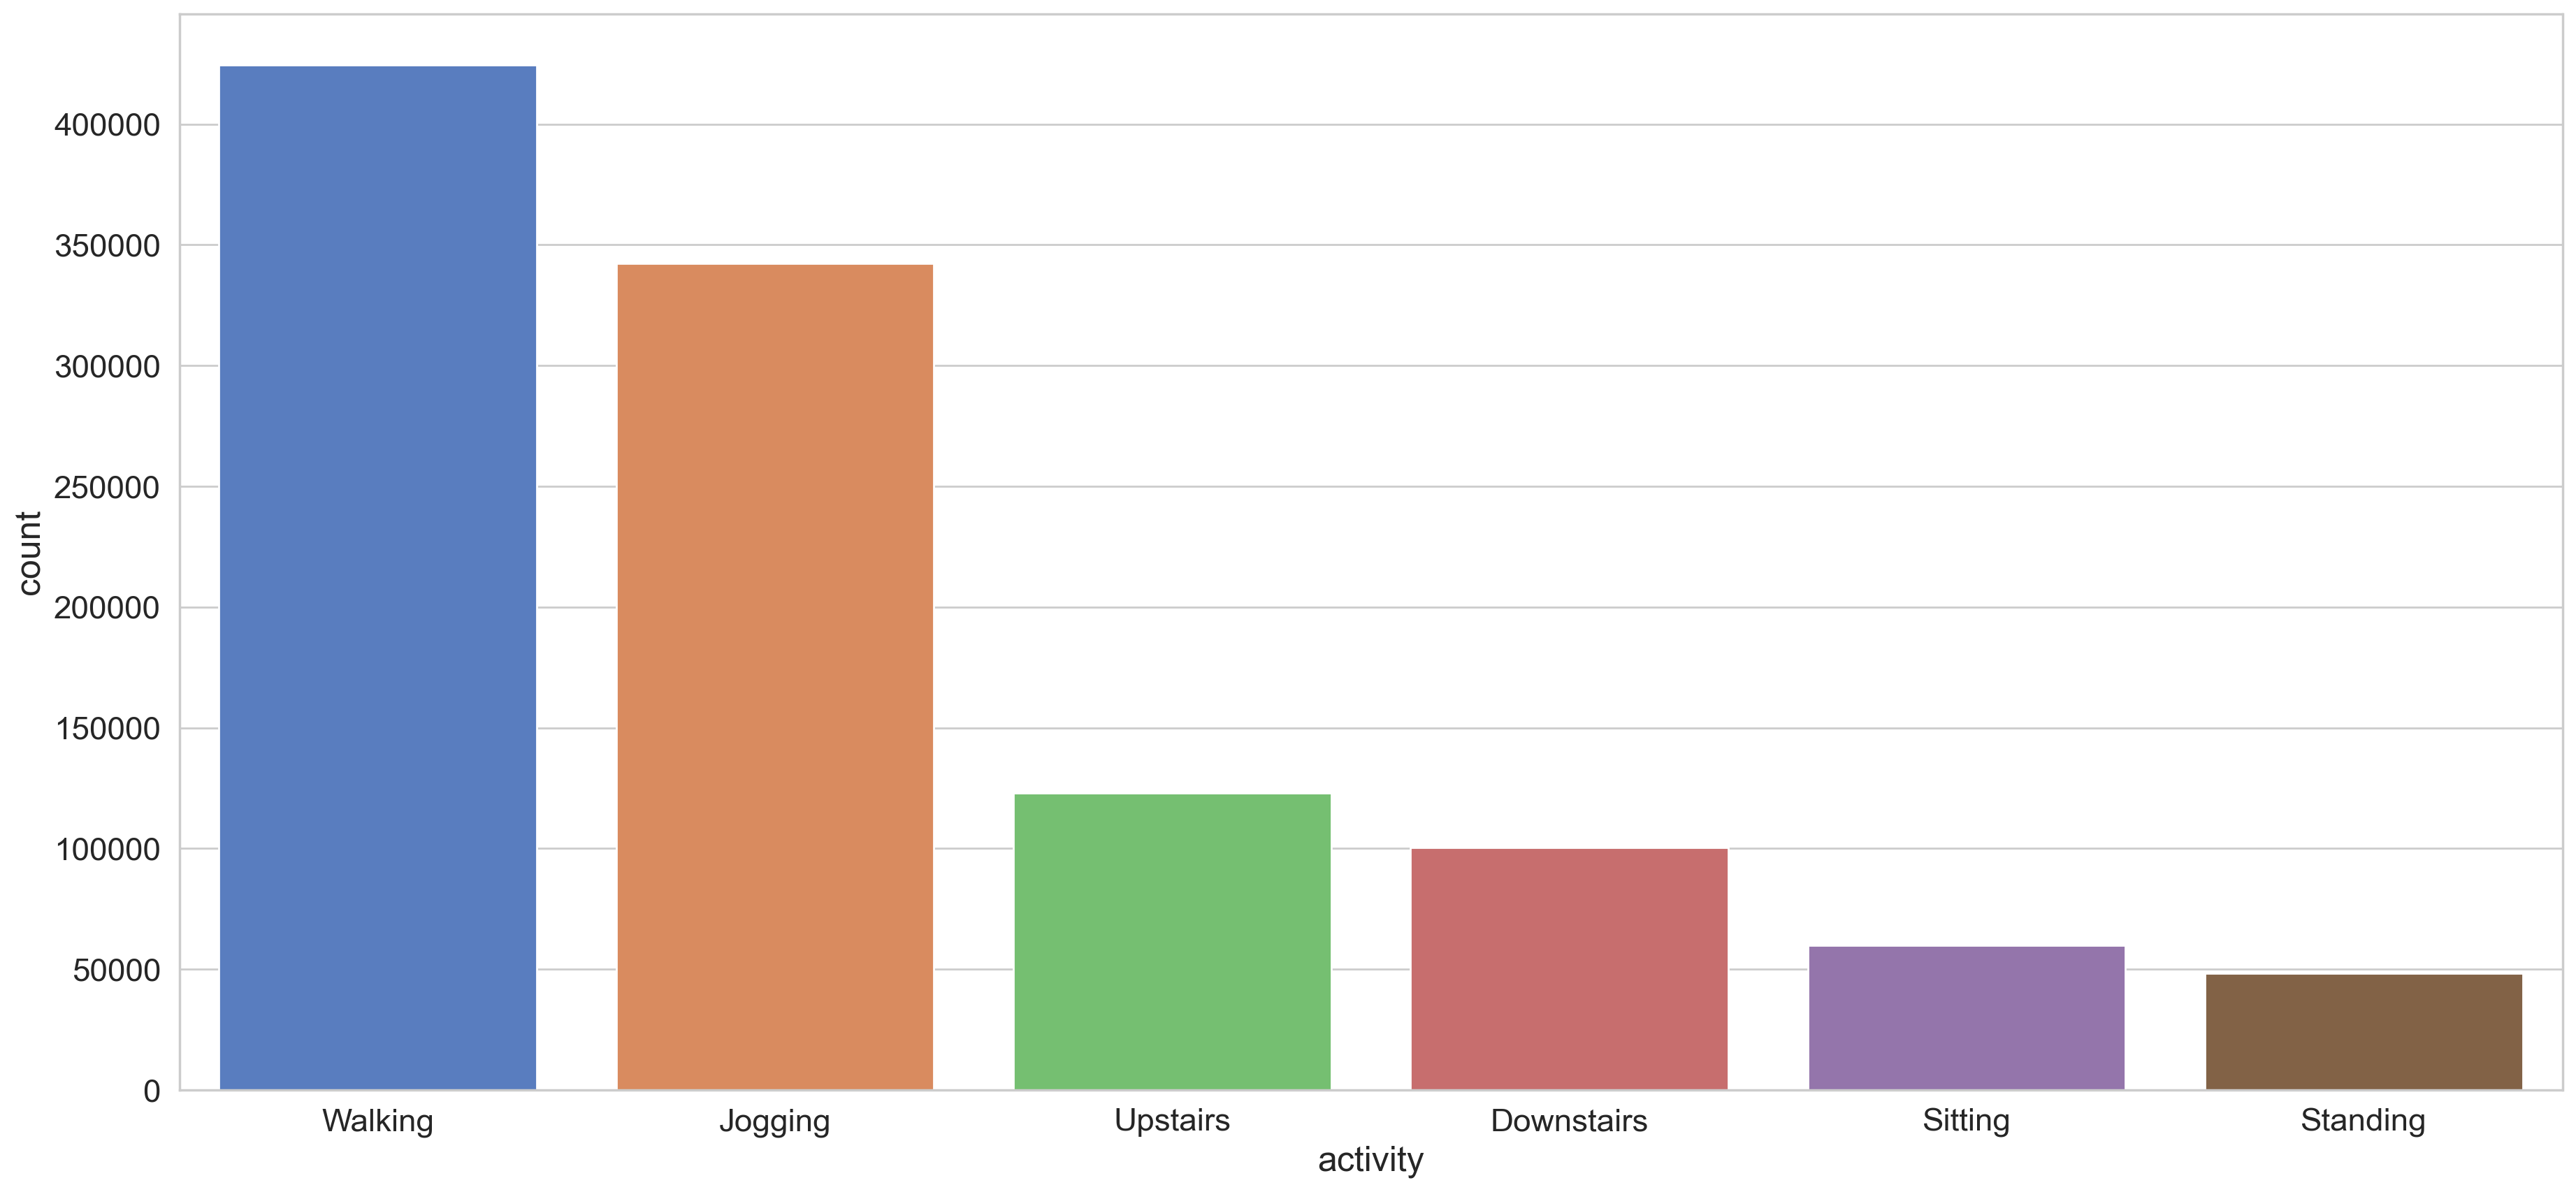

In [40]:
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)

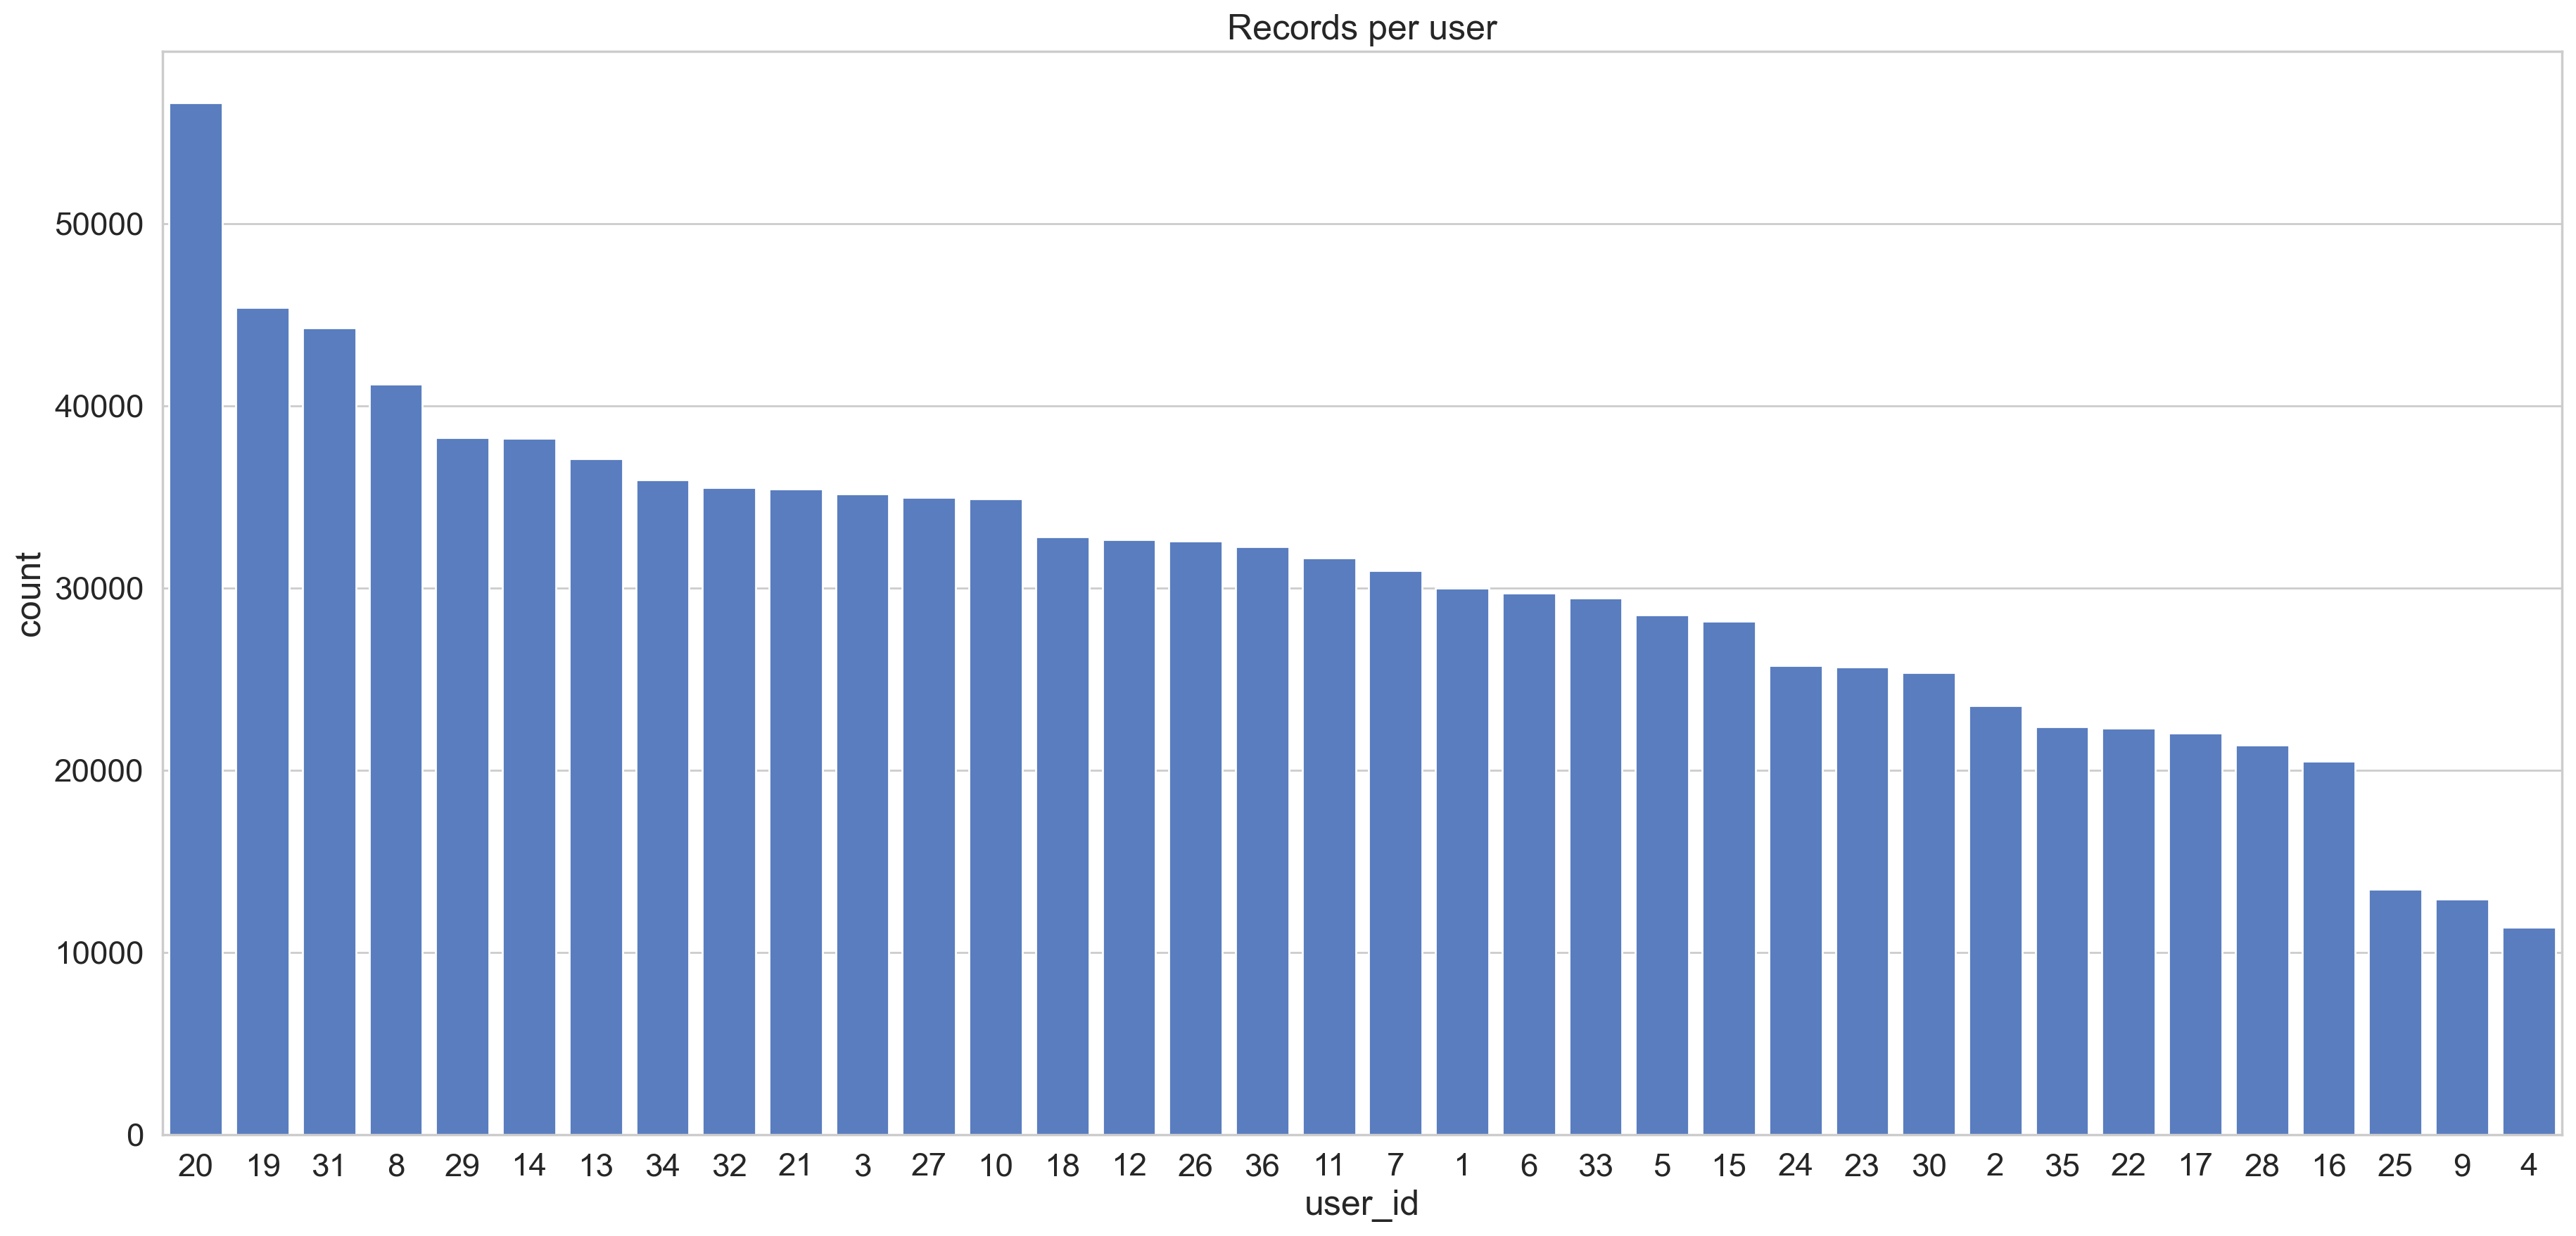

<Figure size 10000x3000 with 0 Axes>

In [41]:
sns.countplot(x="user_id", data=df, palette=[sns.color_palette()[0]],
              order=df['user_id'].value_counts().index)
plt.title("Records per user")
plt.figure(figsize=(100, 30))
plt.show()

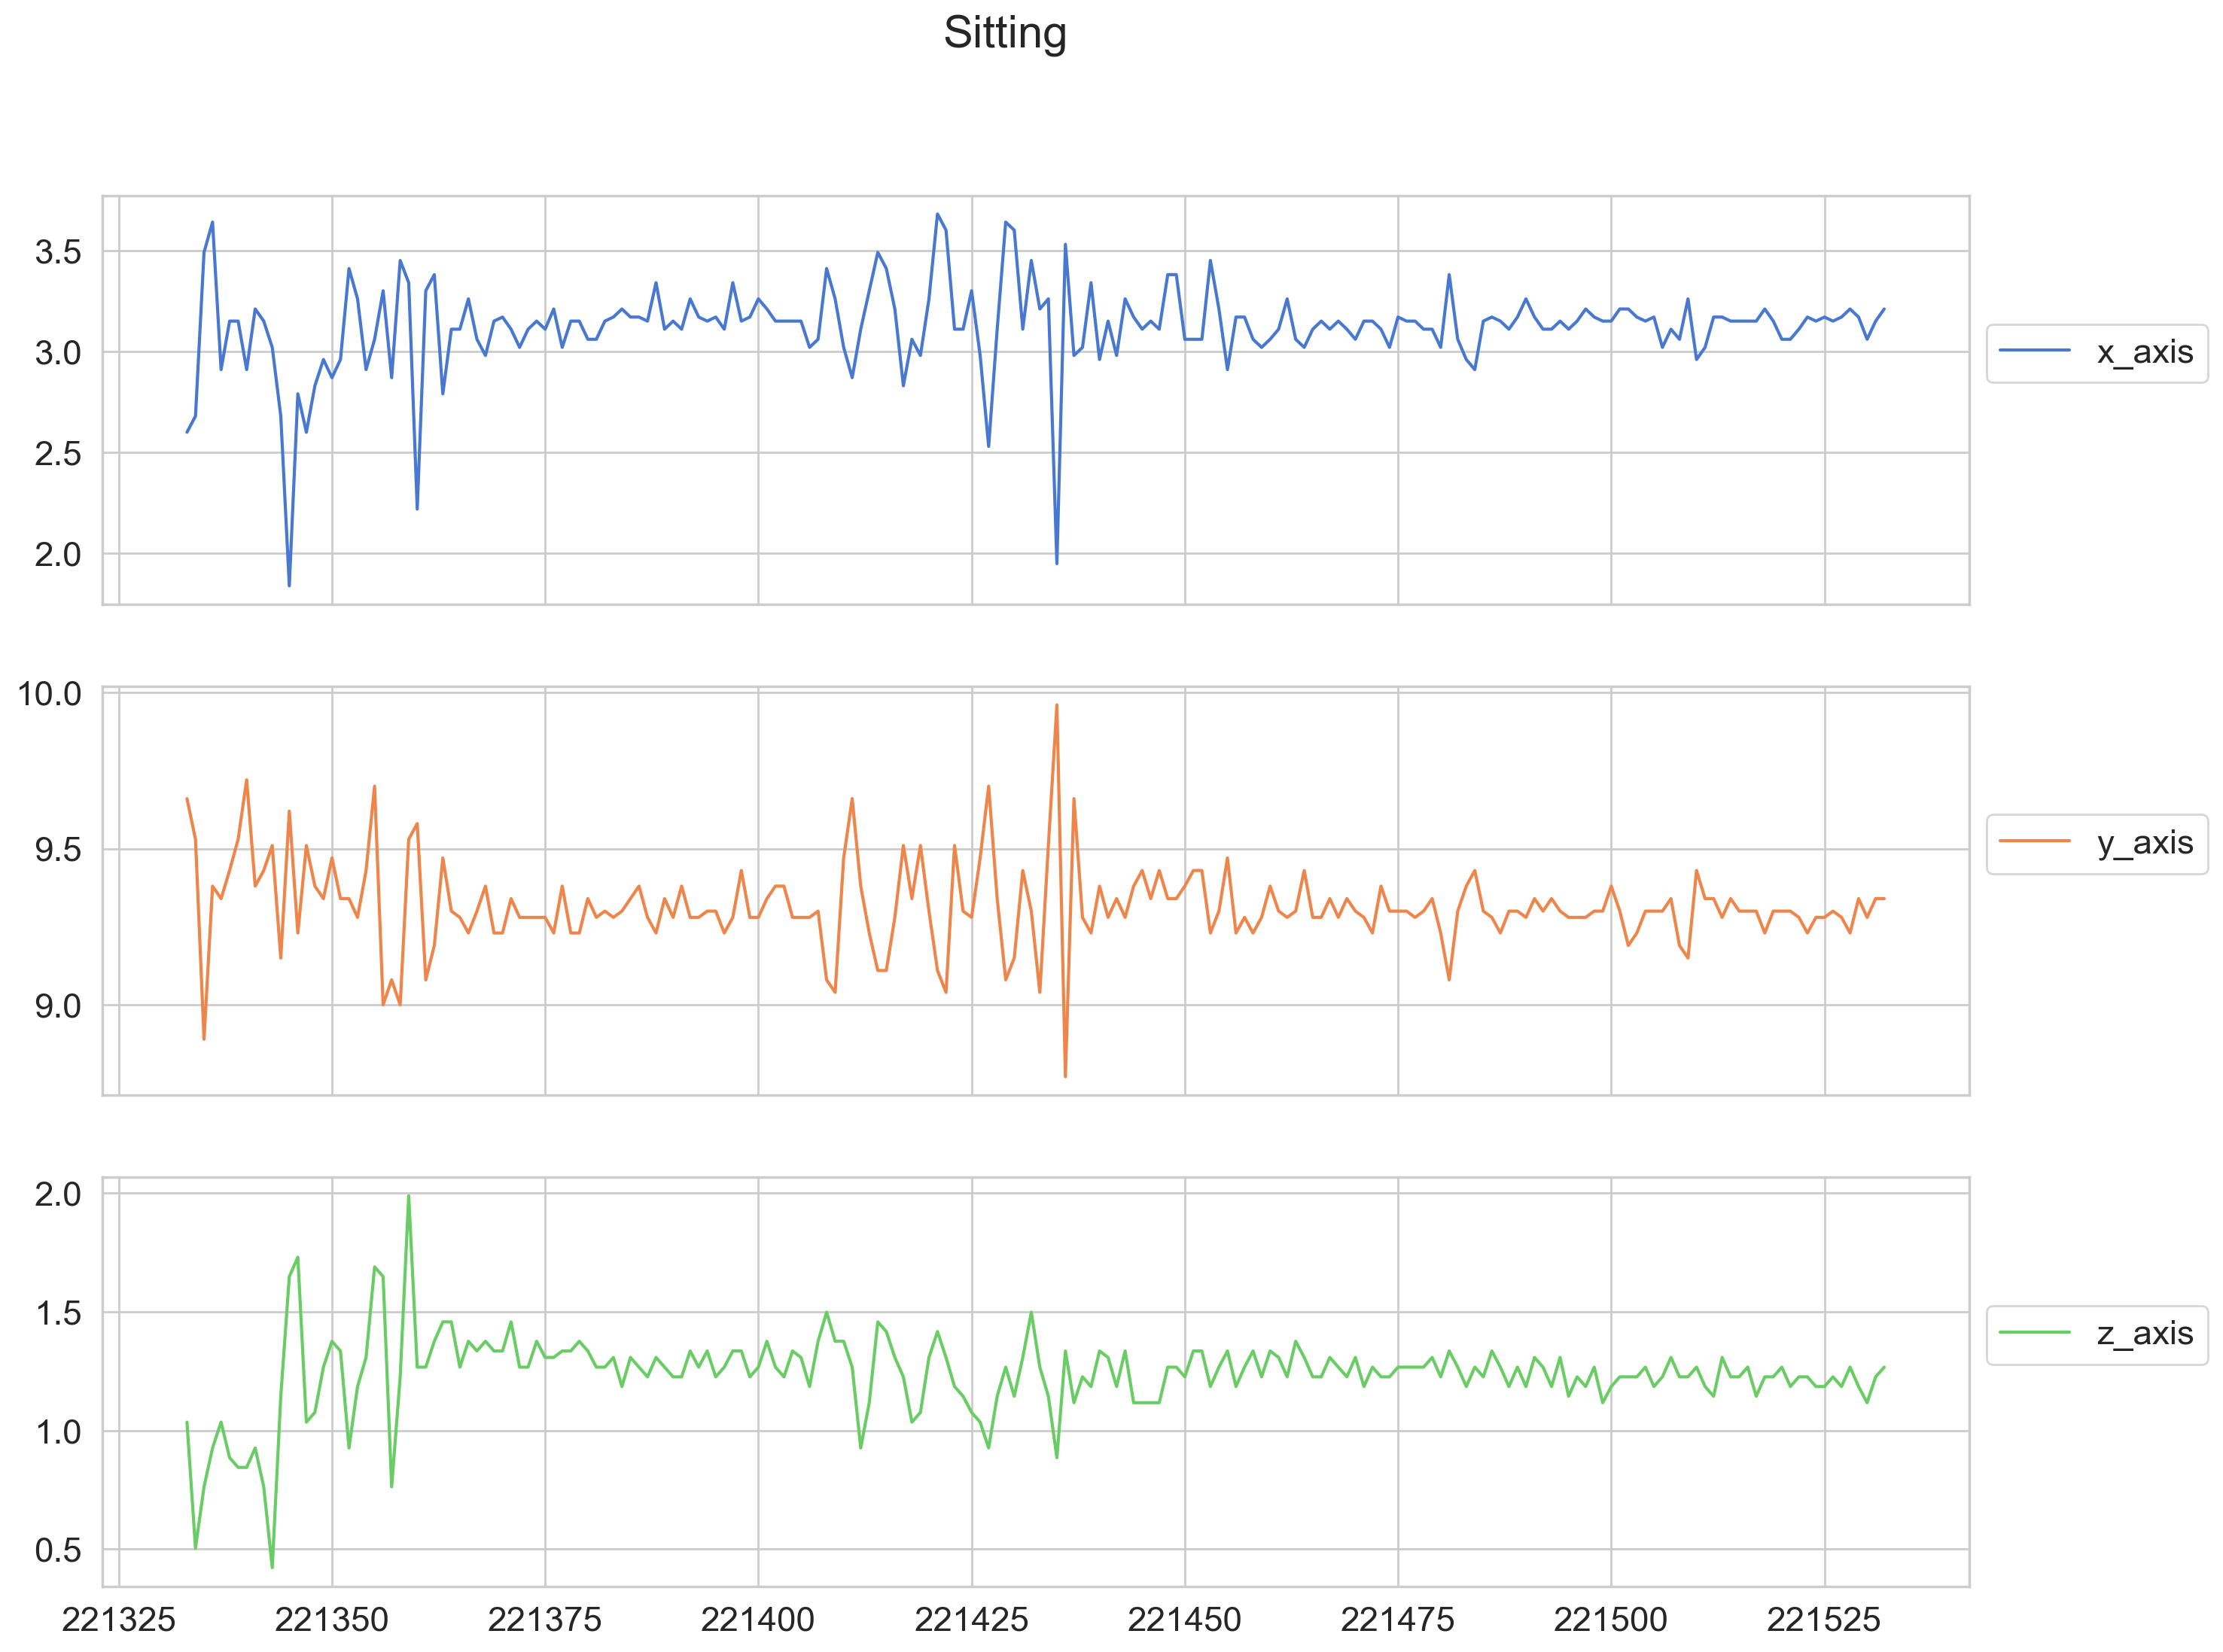

In [42]:
def plot_activity(activity, df):
    data = df[df["activity"] == activity][["x_axis", "y_axis", "z_axis"]][:200]
    axis = data.plot(subplots = True, figsize = (16, 12), title = activity)
    for ax in axis:
        ax.legend(loc = "lower left", bbox_to_anchor = (1.0, 0.5))

plot_activity("Sitting", df)

In [43]:
from sklearn.preprocessing import RobustScaler

scale_columns = ["x_axis", "y_axis", "z_axis"]

scaler = RobustScaler()

scaler = scaler.fit(df[scale_columns])

df.loc[:, scale_columns] = scaler.transform(df[scale_columns].to_numpy())
df

/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
0,33,Jogging,49105962326000,-0.131961,0.566215,0.102015,1
1,33,Jogging,49106062271000,0.648740,0.397381,0.193001,1
2,33,Jogging,49106112167000,0.633834,0.351926,-0.016543,1
3,33,Jogging,49106222305000,-0.120782,1.259408,0.612089,1
4,33,Jogging,49106332290000,-0.199038,0.498032,1.458535,1
...,...,...,...,...,...,...,...
1098198,19,Sitting,131623331483000,1.194254,-1.132300,0.342105,4
1098199,19,Sitting,131623371431000,1.199726,-1.119190,0.350202,4
1098200,19,Sitting,131623411592000,1.205198,-1.109654,0.342105,4
1098201,19,Sitting,131623491487000,1.194254,-1.119190,0.350202,4


In [44]:
df.loc[:, 'ActivityEncoded'] = df['ActivityEncoded'].astype('int64')

In [45]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_data, y_data = create_dataset(df[["x_axis", "y_axis", "z_axis"]], df.ActivityEncoded, TIME_STEPS,
                                  STEP)

X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, stratify=  y_data )
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify=  y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17568, 200, 3) (17568, 1)
(5491, 200, 3) (5491, 1)


In [46]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# 학습 데이터에 OneHotEncoder 적용
enc.fit(y_train)

# 학습, 테스트 및 검증 데이터 변환
y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)
y_val_hot = enc.transform(y_val)

# 데이터의 모양 출력
print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)


(17568, 200, 3) (17568, 6) (5491, 200, 3) (5491, 6)


In [47]:
#Epoch 500

BATCH_SIZE = 32

verbose,epochs,batch_size=1,10, BATCH_SIZE

n_timesteps,n_features,n_outputs= X_train.shape[1],X_train.shape[2],y_train_hot.shape[1]
n_timesteps,n_features,n_outputs

(200, 3, 6)

In [48]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 198, 64)           640       
                                                                 
 flatten_4 (Flatten)         (None, 12672)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               1622144   
                                                                 
 dense_9 (Dense)             (None, 6)                 774       
                                                                 
Total params: 1,623,558
Trainable params: 1,623,558
Non-trainable params: 0
_________________________________________________________________


In [49]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/10


2024-03-06 16:41:21.441512: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-06 16:41:21.685283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 0.7118 - accuracy: 0.7431

2024-03-06 16:41:24.731541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - 4s 19ms/step - loss: 0.7118 - accuracy: 0.7431 - val_loss: 0.4618 - val_accuracy: 0.8290
Epoch 2/10
138/138 [==============================] - 2s 15ms/step - loss: 0.3646 - accuracy: 0.8652 - val_loss: 0.3716 - val_accuracy: 0.8620
Epoch 3/10
138/138 [==============================] - 2s 16ms/step - loss: 0.2513 - accuracy: 0.9107 - val_loss: 0.3438 - val_accuracy: 0.8757
Epoch 4/10
138/138 [==============================] - 2s 16ms/step - loss: 0.1830 - accuracy: 0.9371 - val_loss: 0.2994 - val_accuracy: 0.8887
Epoch 5/10
138/138 [==============================] - 2s 16ms/step - loss: 0.1279 - accuracy: 0.9603 - val_loss: 0.2949 - val_accuracy: 0.9016
Epoch 6/10
138/138 [==============================] - 2s 16ms/step - loss: 0.0866 - accuracy: 0.9764 - val_loss: 0.2778 - val_accuracy: 0.9130
Epoch 7/10
138/138 [==============================] - 2s 16ms/step - loss: 0.0612 - accuracy: 0.9864 - val_loss: 0.3104 - val_accuracy: 0.9003
Epoch 8/10

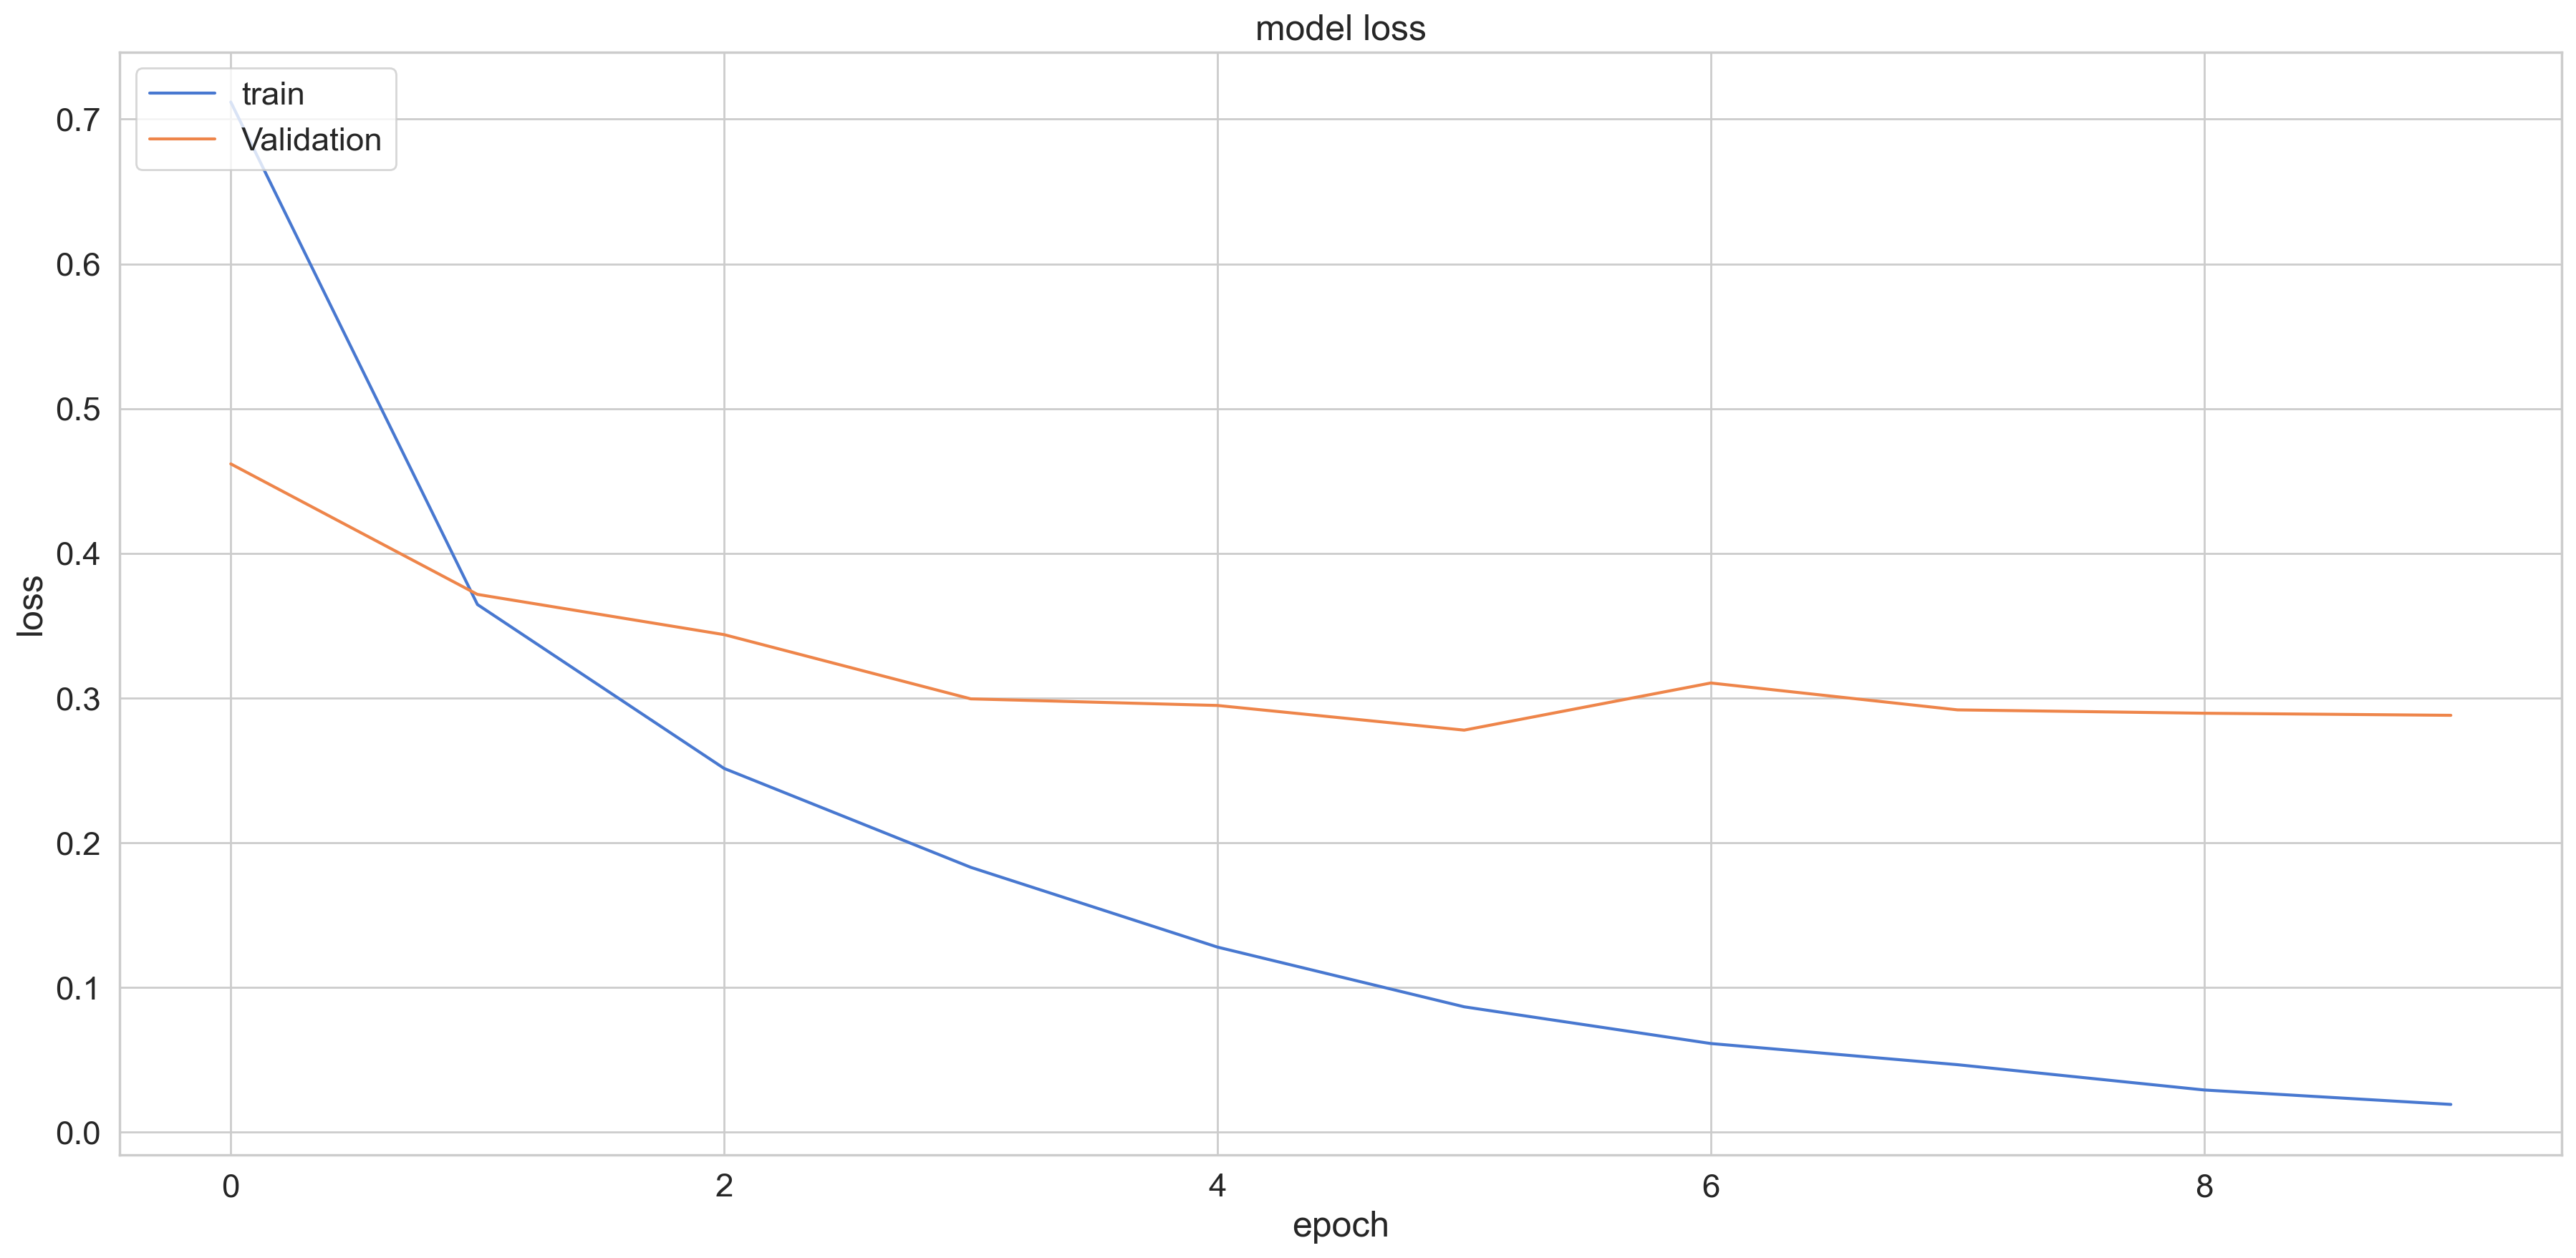

In [50]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

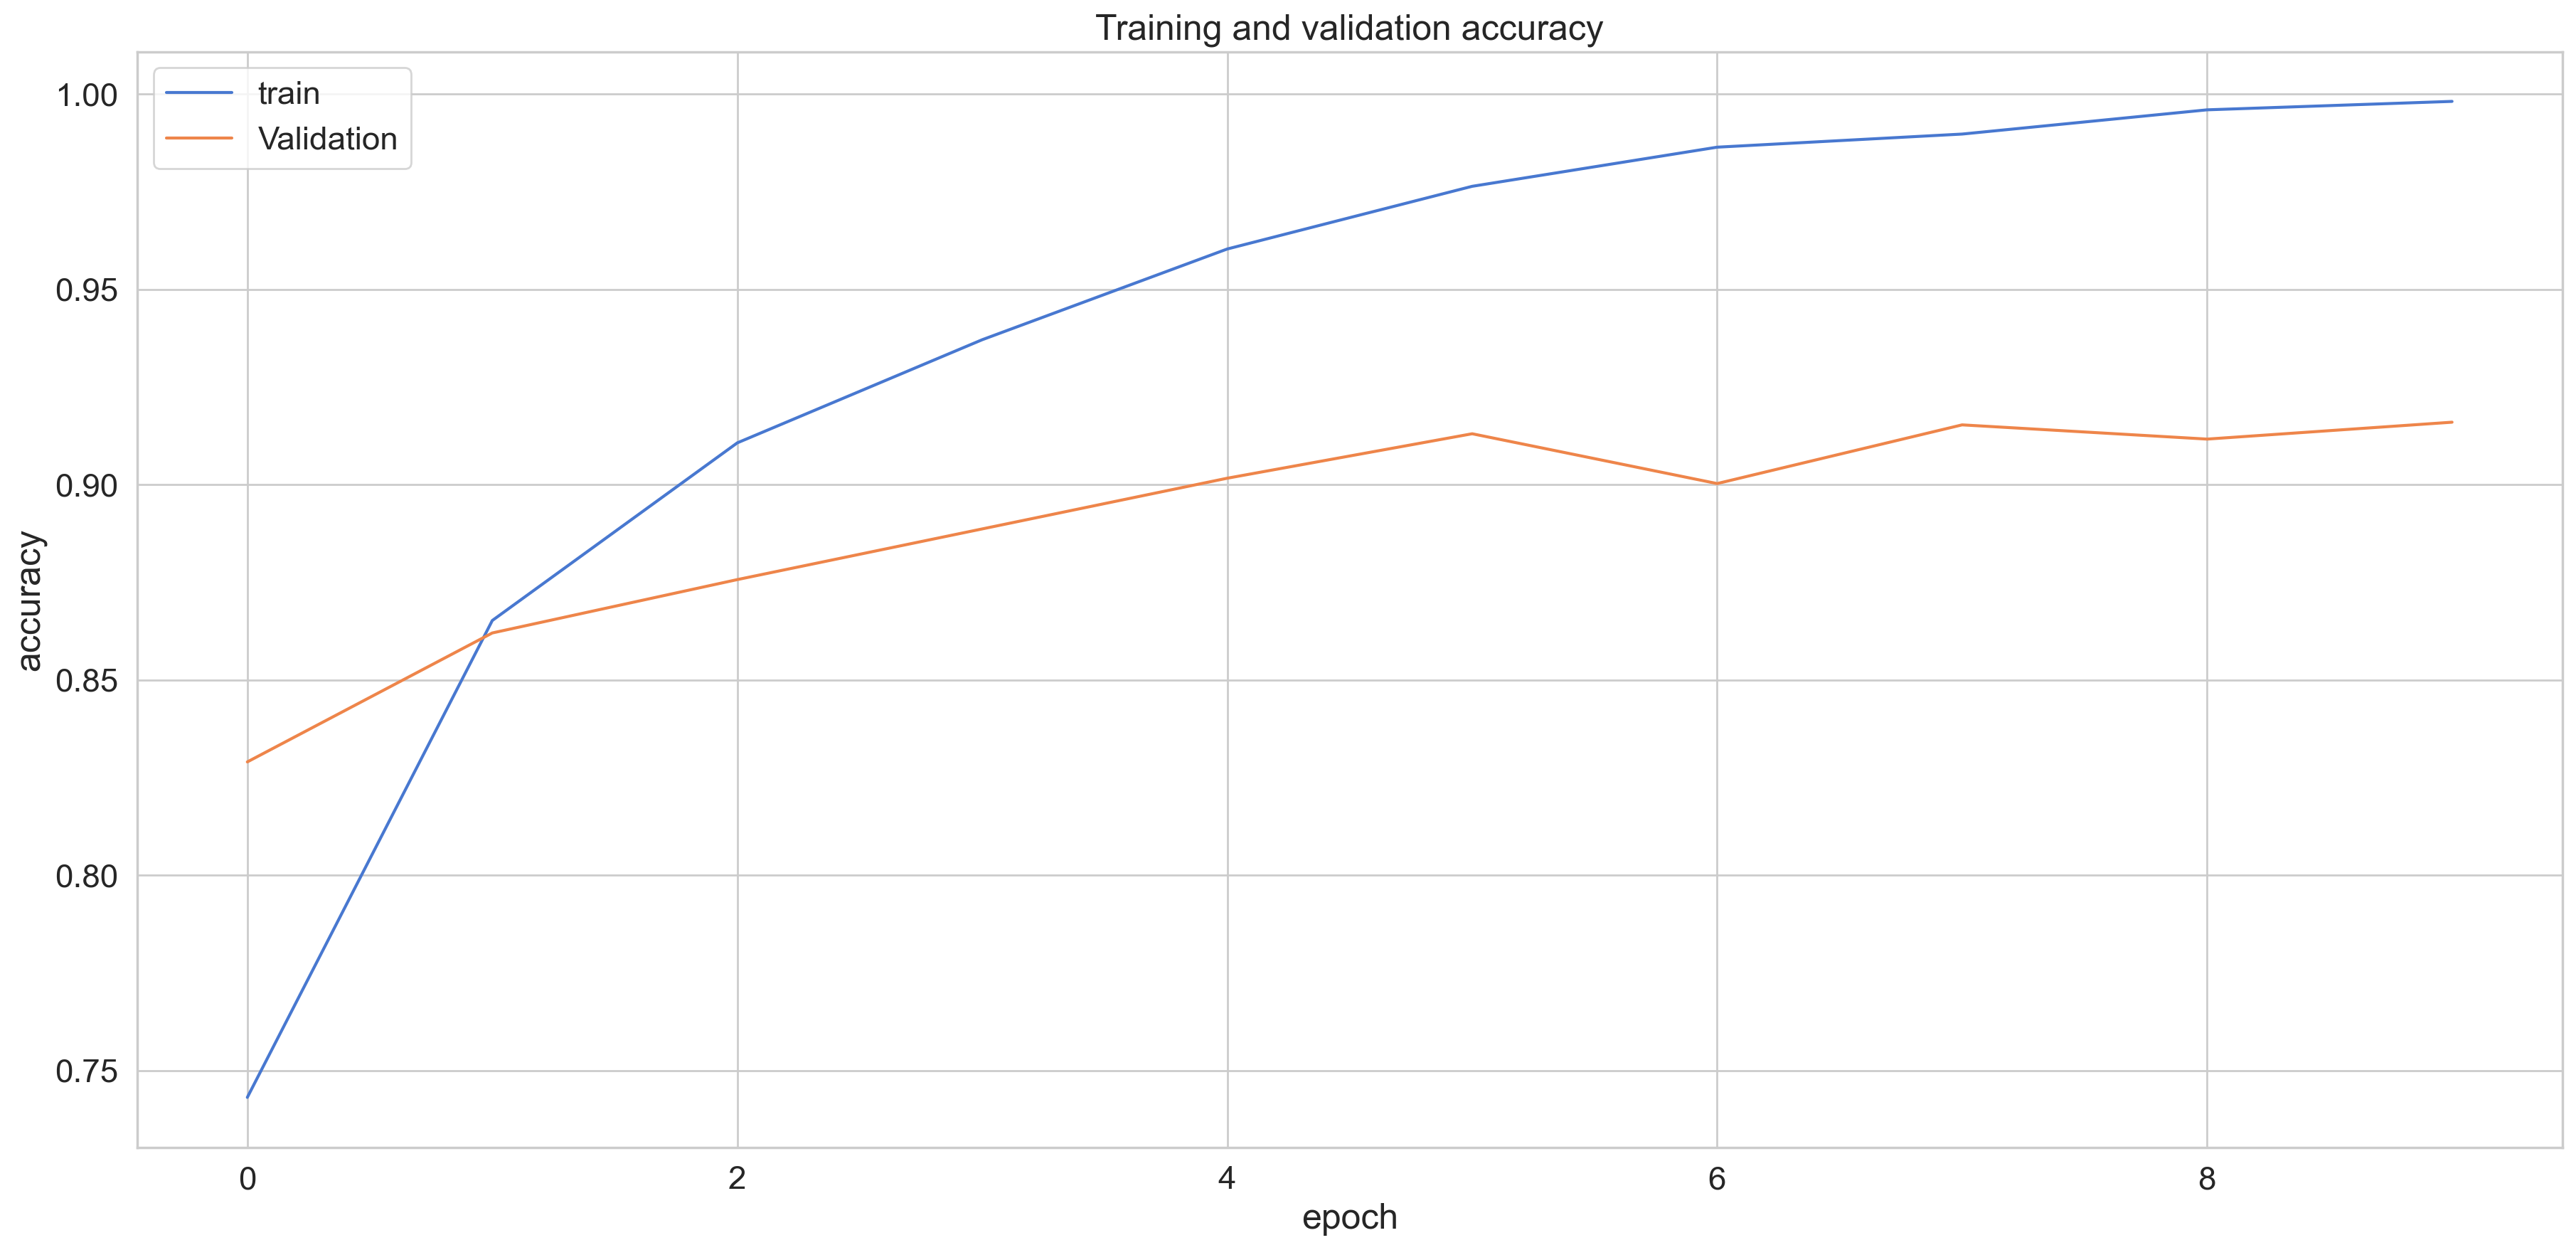

In [51]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

 77/172 [============>.................] - ETA: 0s

2024-03-07 01:19:00.100721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 0s 2ms/step
f1_score =  0.9091383918661485
0.9118557639774176
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2123
           1       0.96      0.97      0.97      1710
           2       0.78      0.65      0.71       614
           3       0.71      0.68      0.70       502
           4       1.00      0.98      0.99       300
           5       0.98      0.98      0.98       242

    accuracy                           0.91      5491
   macro avg       0.89      0.87      0.88      5491
weighted avg       0.91      0.91      0.91      5491



<Axes: >

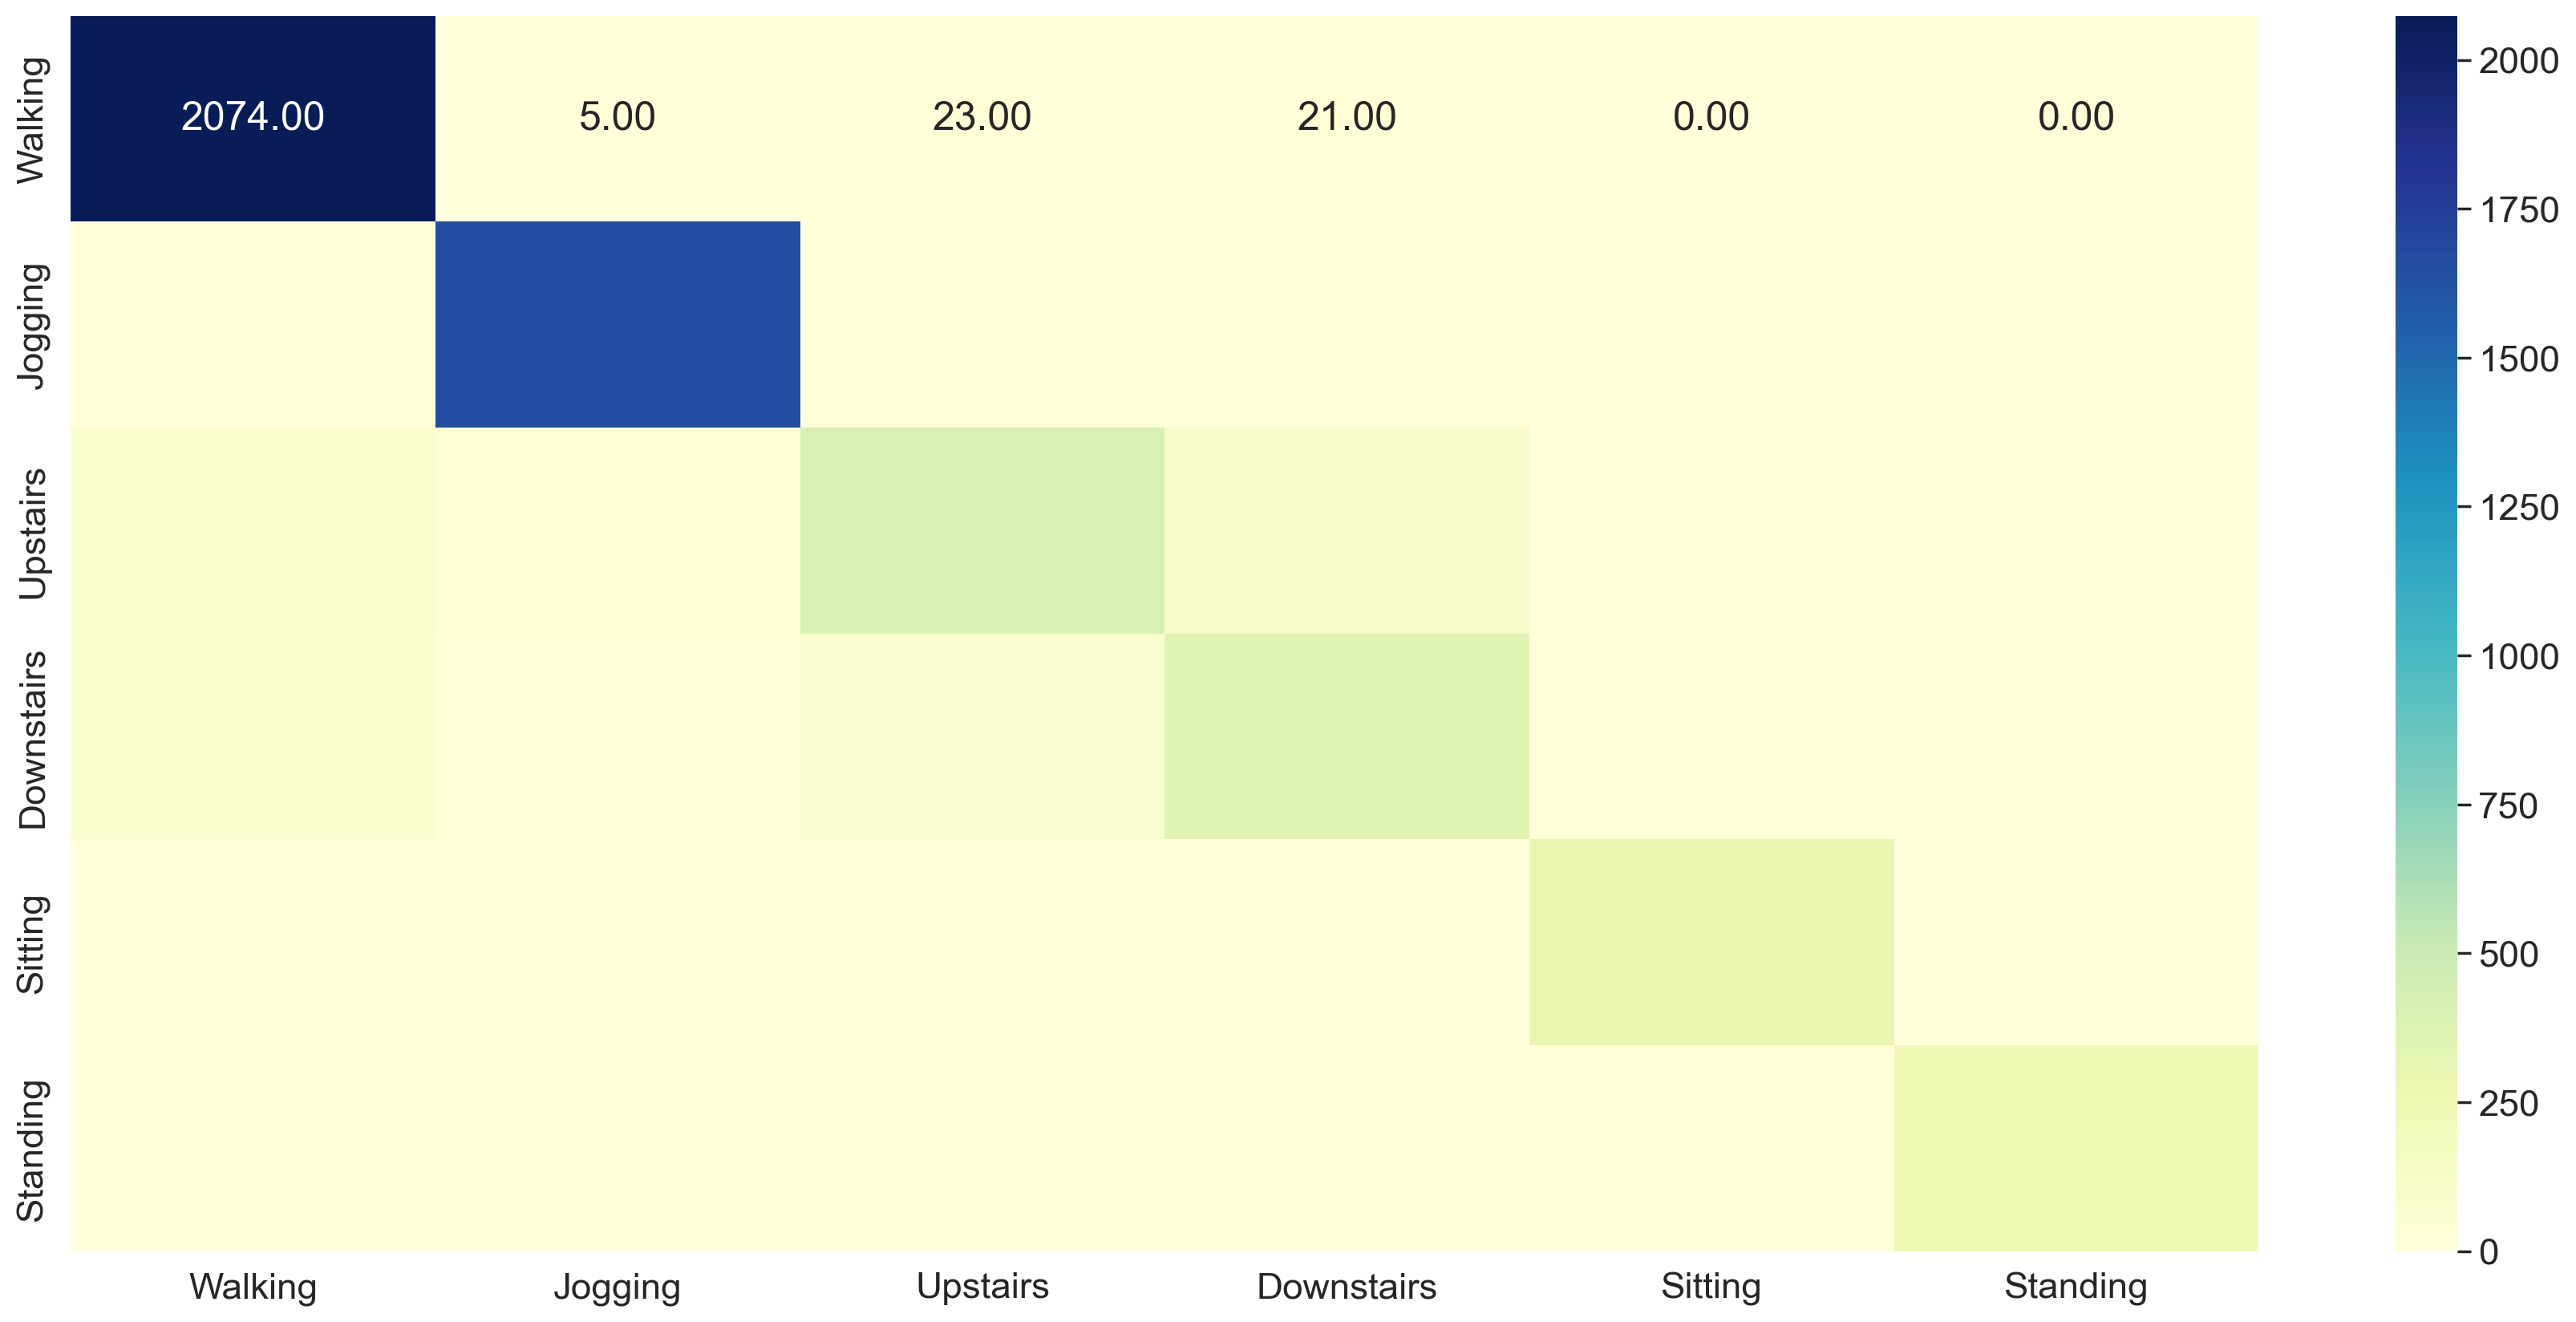

In [52]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [53]:
# Model 2
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 198, 64)           640       
                                                                 
 conv1d_6 (Conv1D)           (None, 196, 64)           12352     
                                                                 
 flatten_5 (Flatten)         (None, 12544)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               1605760   
                                                                 
 dense_11 (Dense)            (None, 6)                 774       
                                                                 
Total params: 1,619,526
Trainable params: 1,619,526
Non-trainable params: 0
_________________________________________________________________


In [54]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/10
  1/138 [..............................] - ETA: 54s - loss: 1.8424 - accuracy: 0.1172

2024-03-07 01:19:25.627795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 0.6517 - accuracy: 0.7555

2024-03-07 01:19:27.886460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - 3s 18ms/step - loss: 0.6517 - accuracy: 0.7555 - val_loss: 0.3607 - val_accuracy: 0.8527
Epoch 2/10
138/138 [==============================] - 2s 17ms/step - loss: 0.2635 - accuracy: 0.9070 - val_loss: 0.2401 - val_accuracy: 0.9094
Epoch 3/10
138/138 [==============================] - 2s 16ms/step - loss: 0.1665 - accuracy: 0.9430 - val_loss: 0.1975 - val_accuracy: 0.9251
Epoch 4/10
138/138 [==============================] - 2s 16ms/step - loss: 0.0962 - accuracy: 0.9728 - val_loss: 0.1660 - val_accuracy: 0.9440
Epoch 5/10
138/138 [==============================] - 2s 15ms/step - loss: 0.0665 - accuracy: 0.9808 - val_loss: 0.1845 - val_accuracy: 0.9360
Epoch 6/10
138/138 [==============================] - 2s 15ms/step - loss: 0.0408 - accuracy: 0.9904 - val_loss: 0.1554 - val_accuracy: 0.9510
Epoch 7/10
138/138 [==============================] - 2s 15ms/step - loss: 0.0232 - accuracy: 0.9960 - val_loss: 0.2079 - val_accuracy: 0.9381
Epoch 8/10

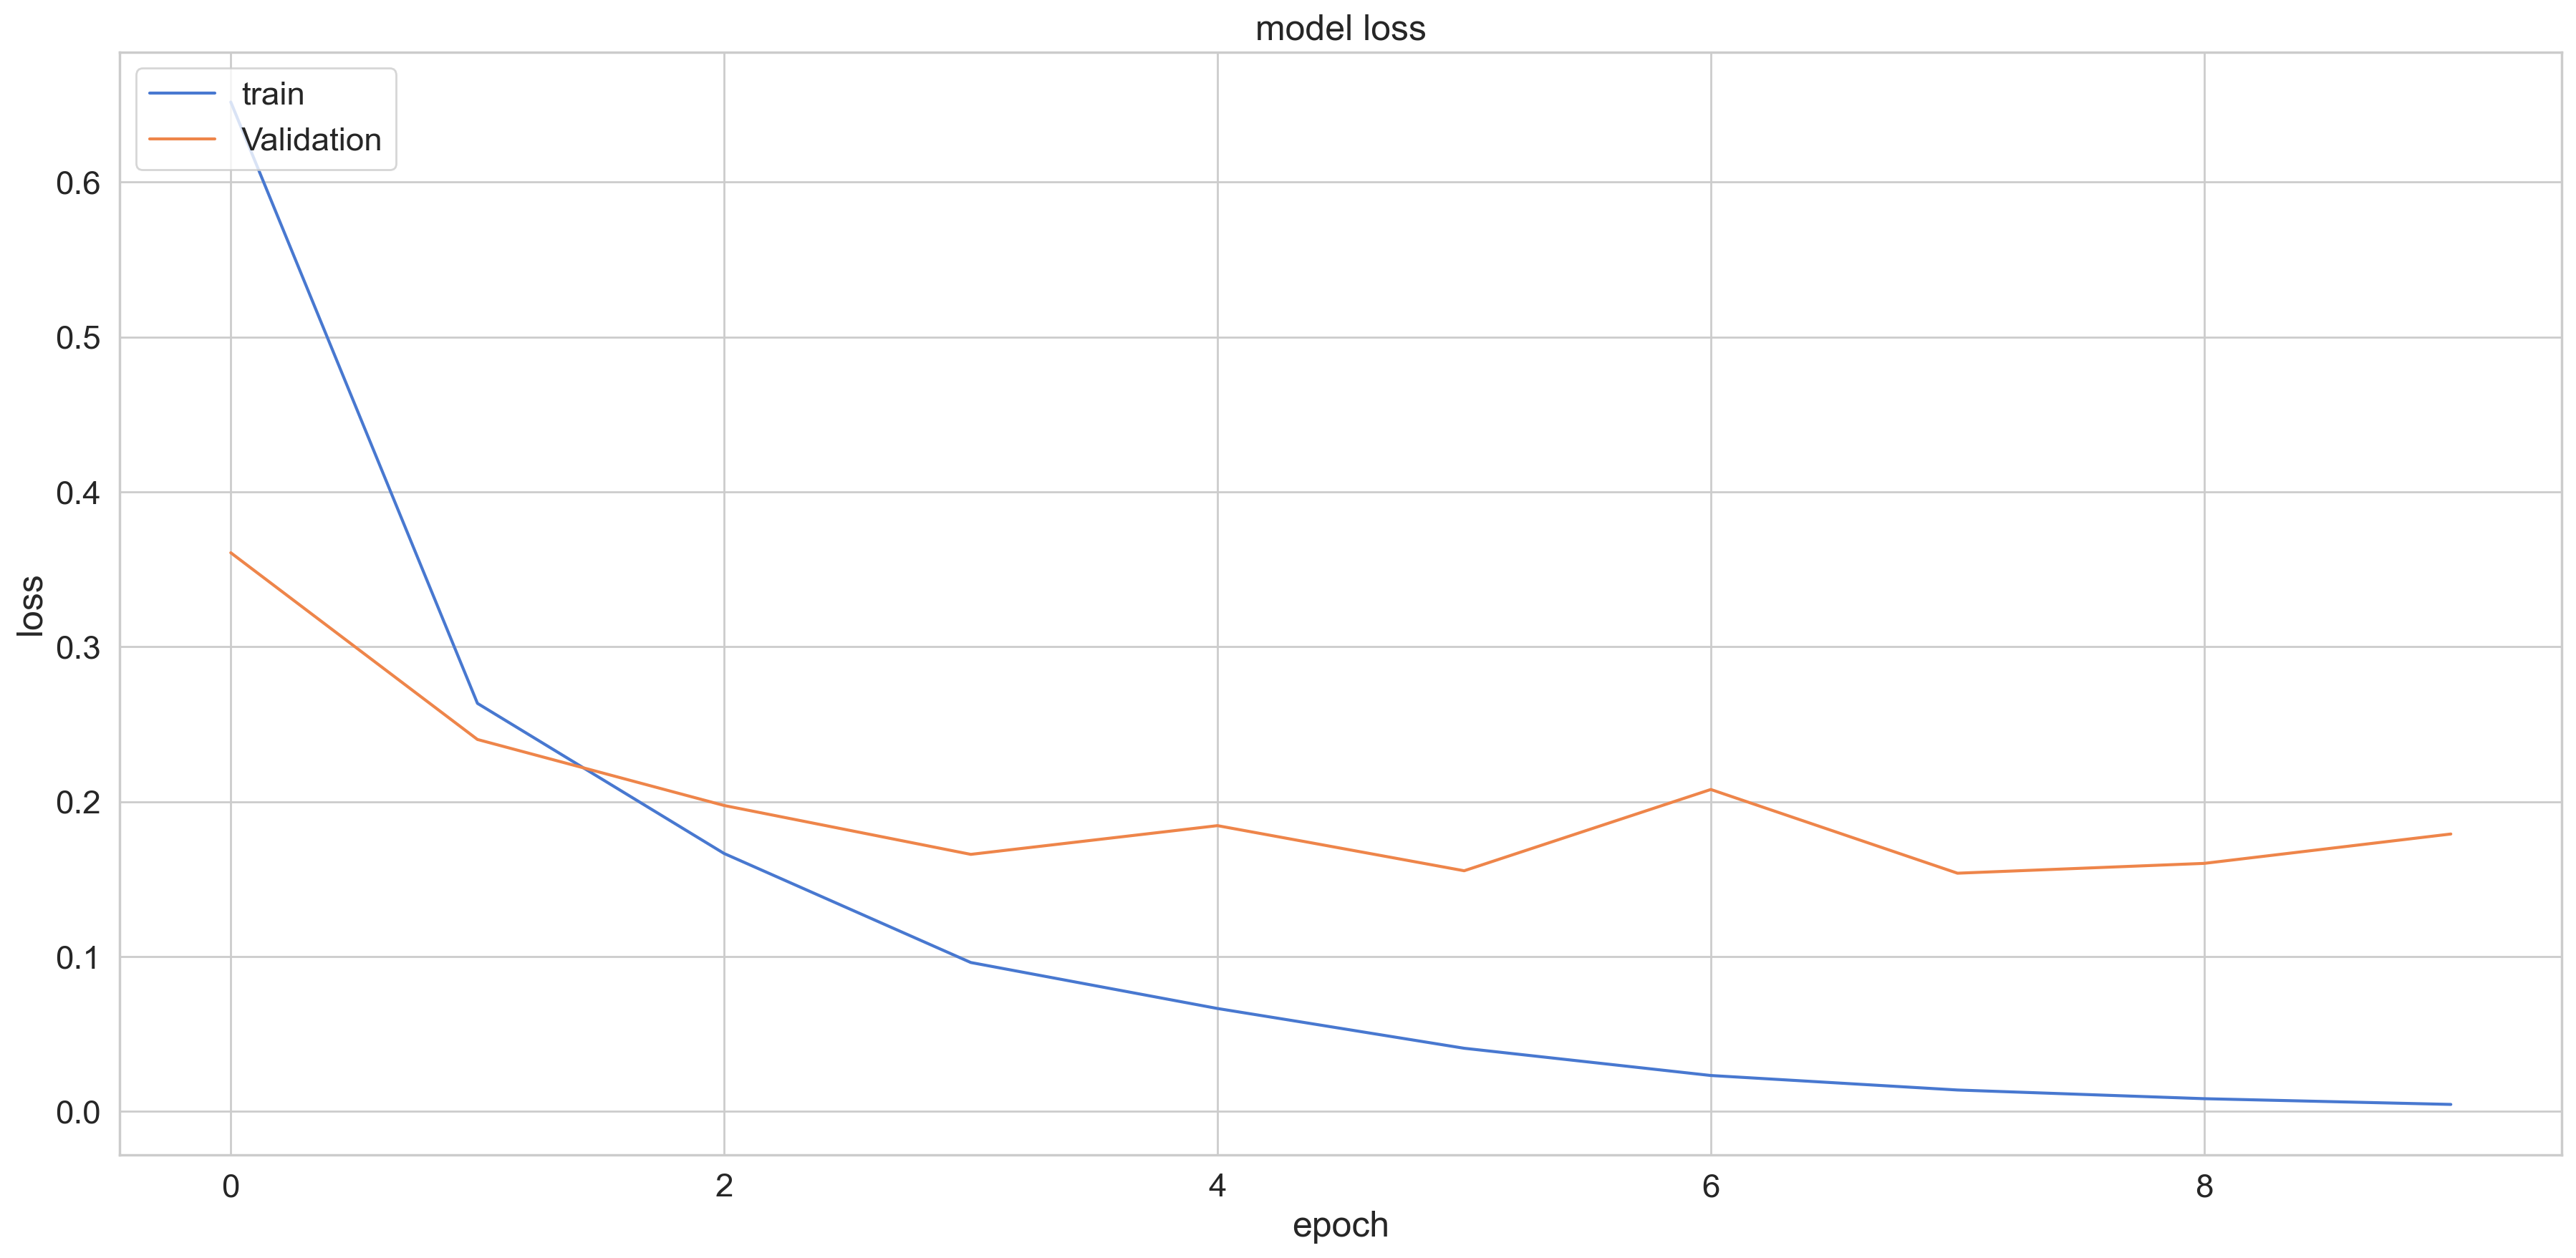

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

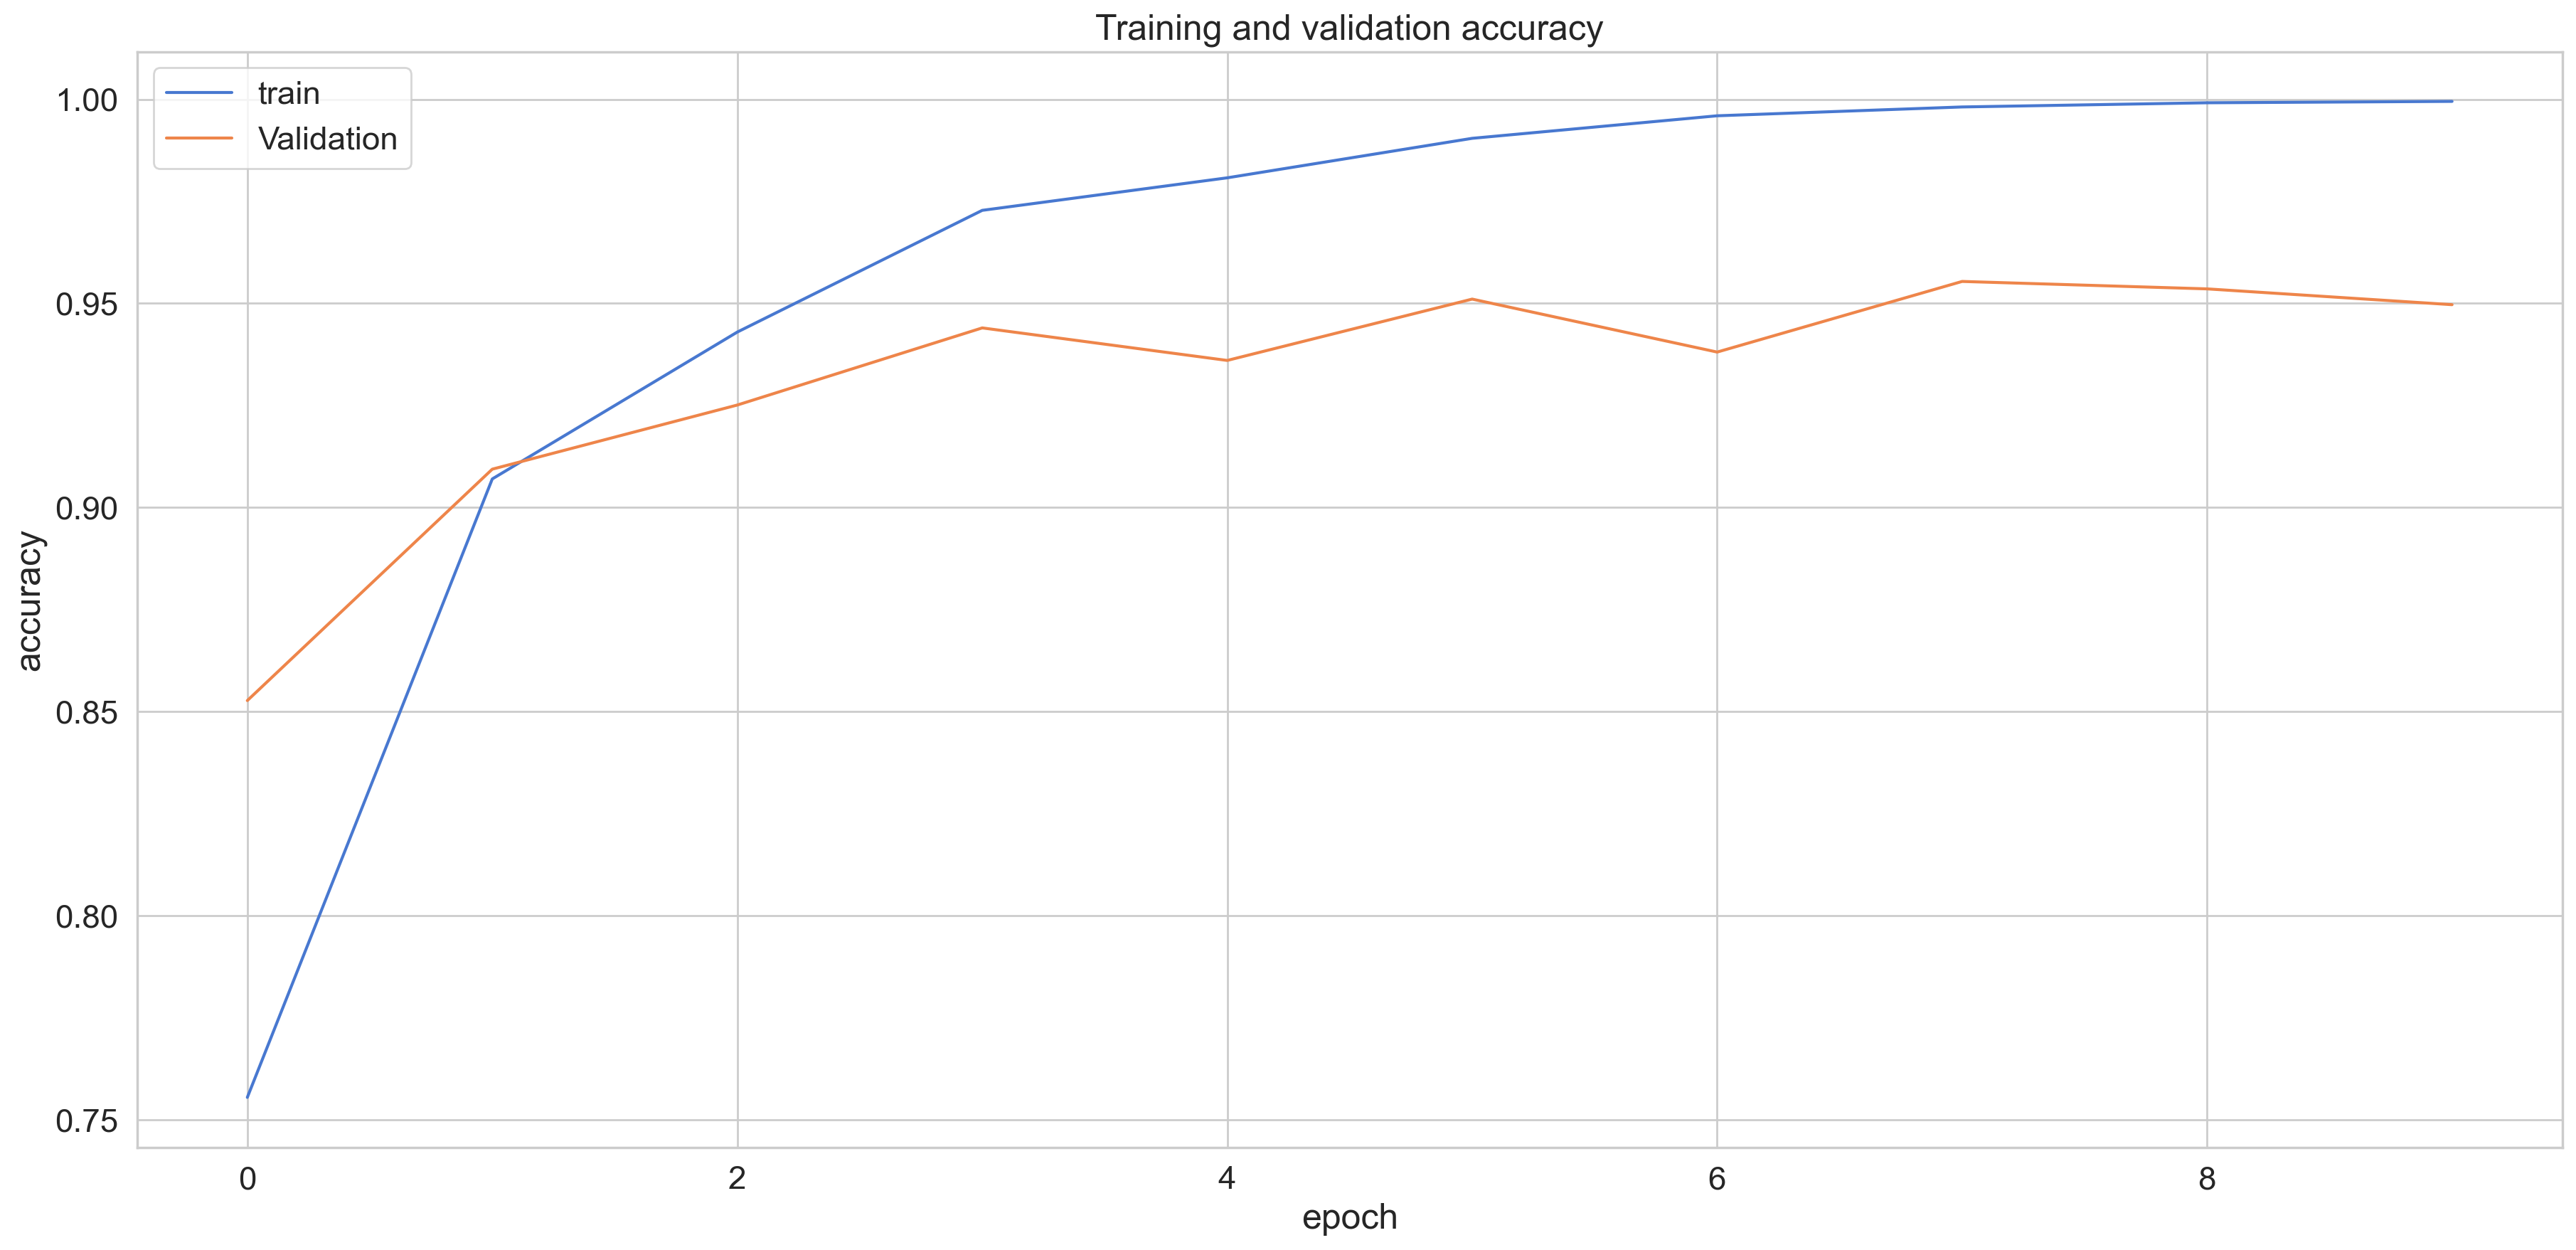

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

 75/172 [============>.................] - ETA: 0s

2024-03-07 01:20:14.892866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 0s 2ms/step
f1_score =  0.9499853549408448
0.9513749772354763
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2123
           1       0.97      0.99      0.98      1710
           2       0.90      0.78      0.84       614
           3       0.87      0.81      0.84       502
           4       1.00      0.98      0.99       300
           5       0.98      0.98      0.98       242

    accuracy                           0.95      5491
   macro avg       0.95      0.92      0.93      5491
weighted avg       0.95      0.95      0.95      5491



<Axes: >

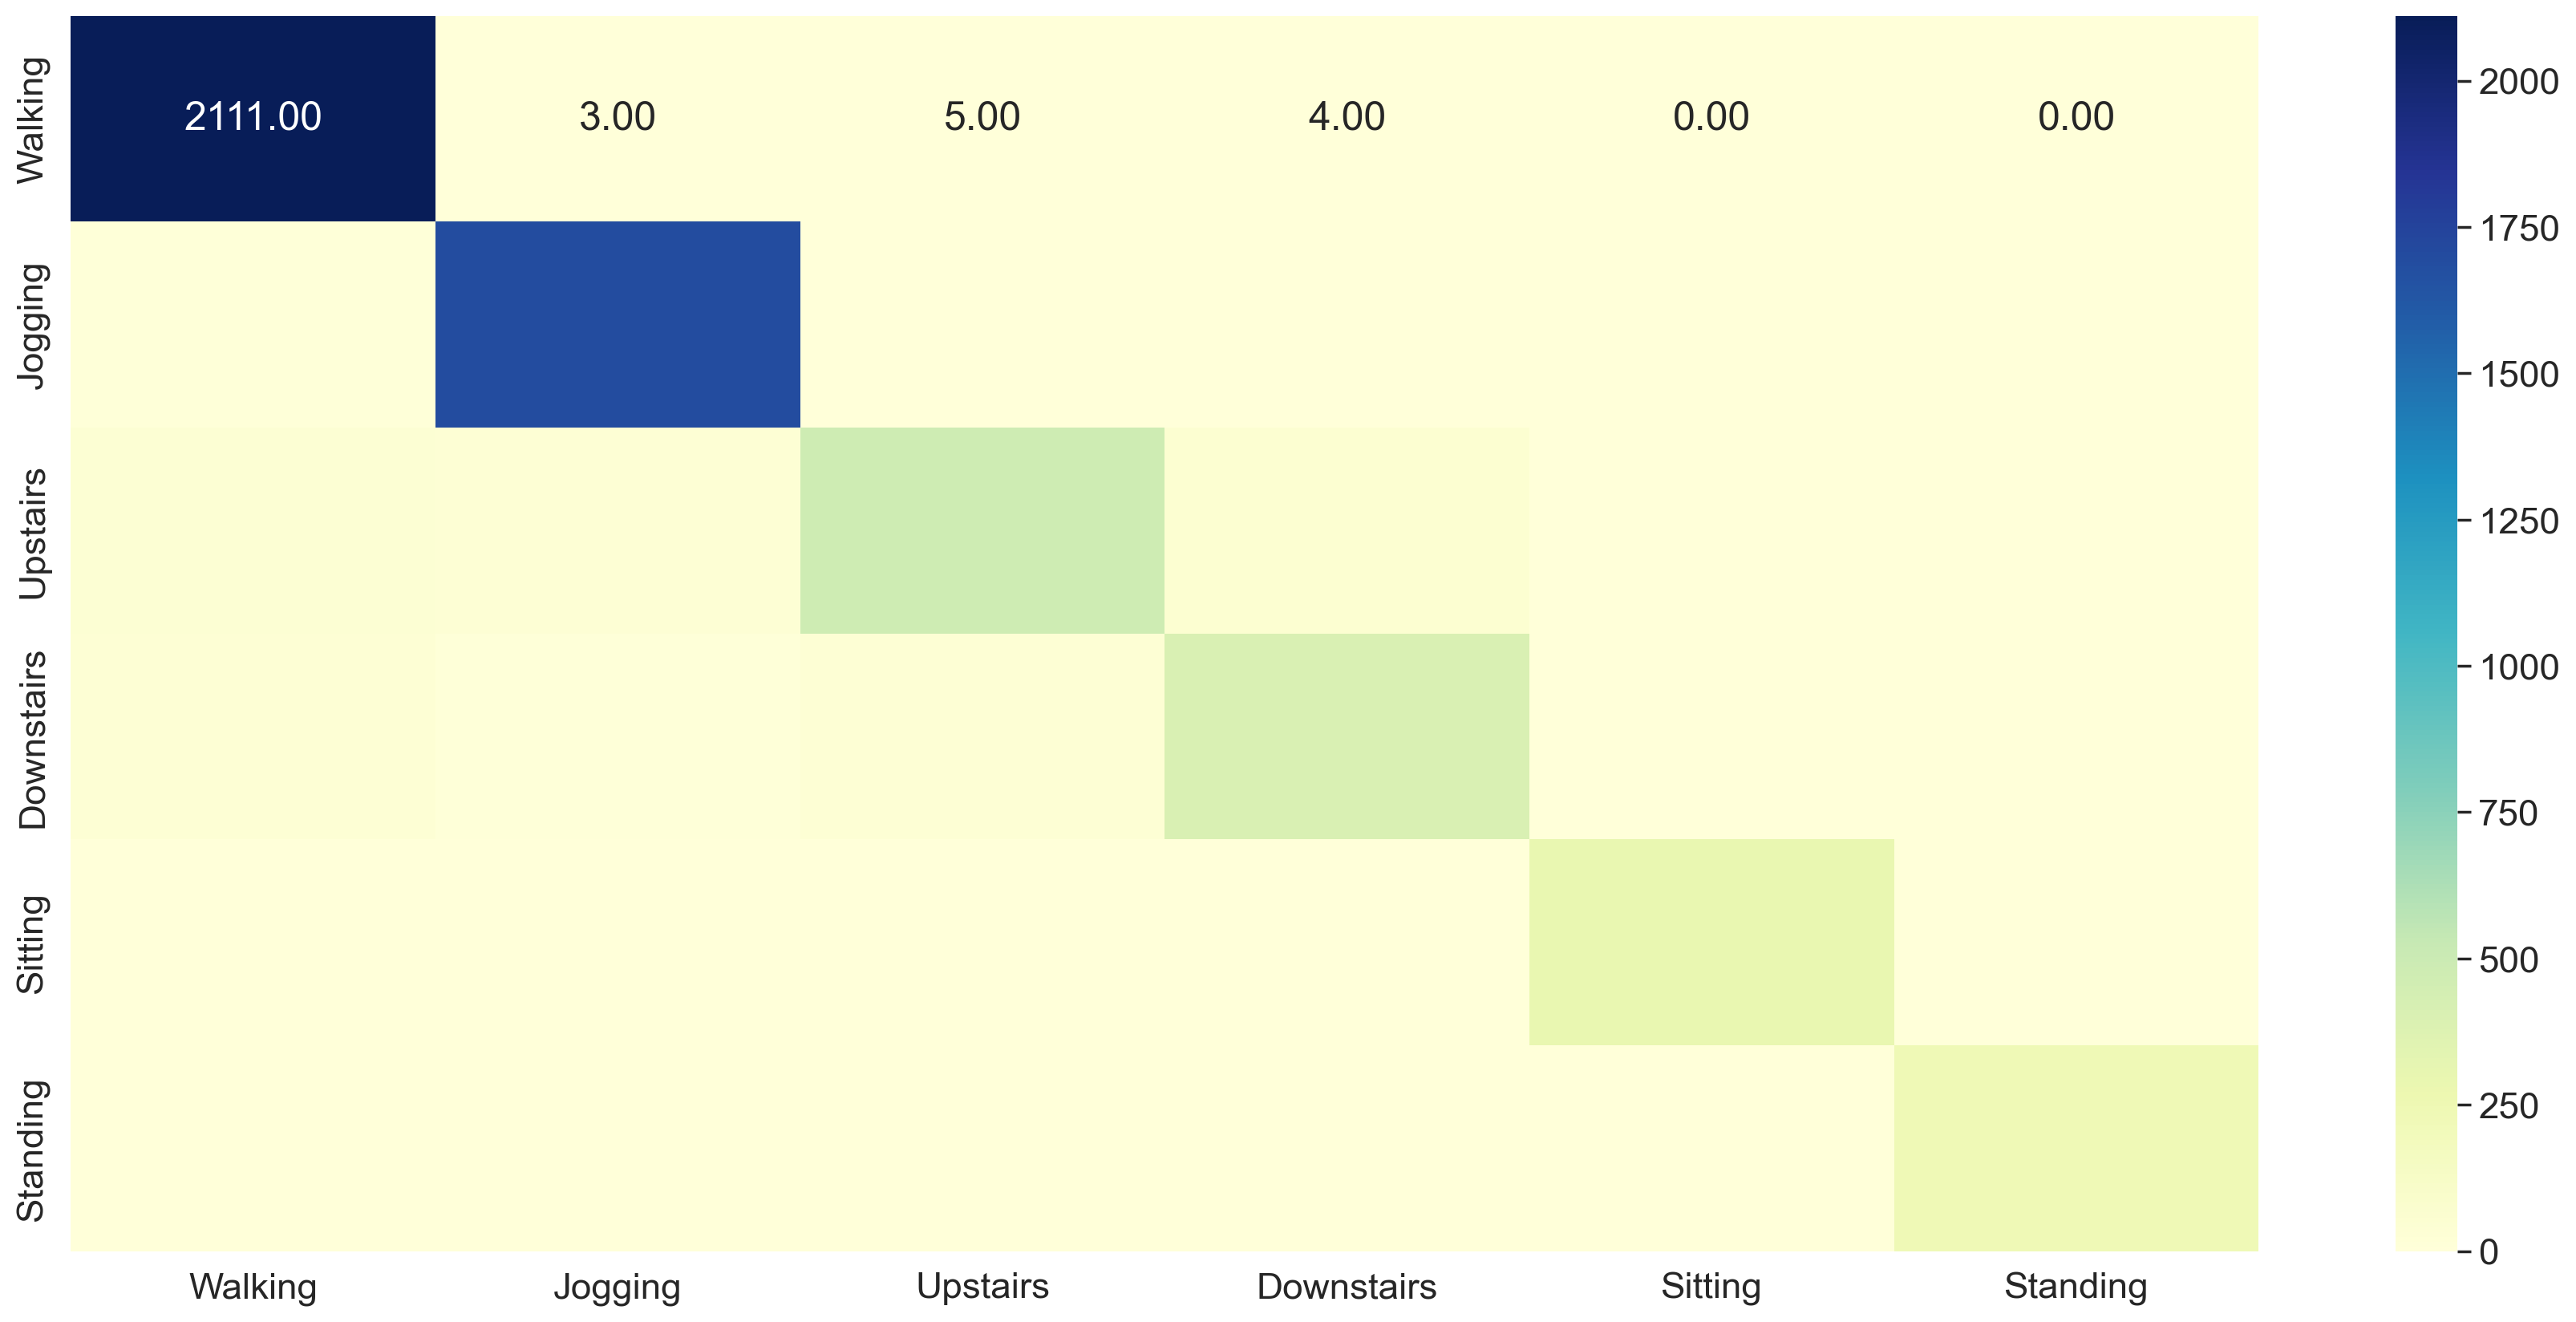

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [58]:
# Model 3
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 198, 64)           640       
                                                                 
 conv1d_8 (Conv1D)           (None, 196, 64)           12352     
                                                                 
 conv1d_9 (Conv1D)           (None, 194, 64)           12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 97, 64)           0         
 )                                                               
                                                                 
 flatten_6 (Flatten)         (None, 6208)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               794752    
                                                      

In [59]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/10


2024-03-07 01:20:37.044372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 0.5534 - accuracy: 0.7822

2024-03-07 01:20:39.808200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - 3s 21ms/step - loss: 0.5534 - accuracy: 0.7822 - val_loss: 0.3380 - val_accuracy: 0.8837
Epoch 2/10
138/138 [==============================] - 3s 18ms/step - loss: 0.2181 - accuracy: 0.9245 - val_loss: 0.2124 - val_accuracy: 0.9360
Epoch 3/10
138/138 [==============================] - 3s 18ms/step - loss: 0.1209 - accuracy: 0.9613 - val_loss: 0.1272 - val_accuracy: 0.9624
Epoch 4/10
138/138 [==============================] - 3s 19ms/step - loss: 0.0736 - accuracy: 0.9783 - val_loss: 0.1180 - val_accuracy: 0.9608
Epoch 5/10
138/138 [==============================] - 3s 18ms/step - loss: 0.0545 - accuracy: 0.9841 - val_loss: 0.1169 - val_accuracy: 0.9631
Epoch 6/10
138/138 [==============================] - 3s 18ms/step - loss: 0.0361 - accuracy: 0.9893 - val_loss: 0.0952 - val_accuracy: 0.9674
Epoch 7/10
138/138 [==============================] - 3s 18ms/step - loss: 0.0214 - accuracy: 0.9941 - val_loss: 0.0871 - val_accuracy: 0.9724
Epoch 8/10

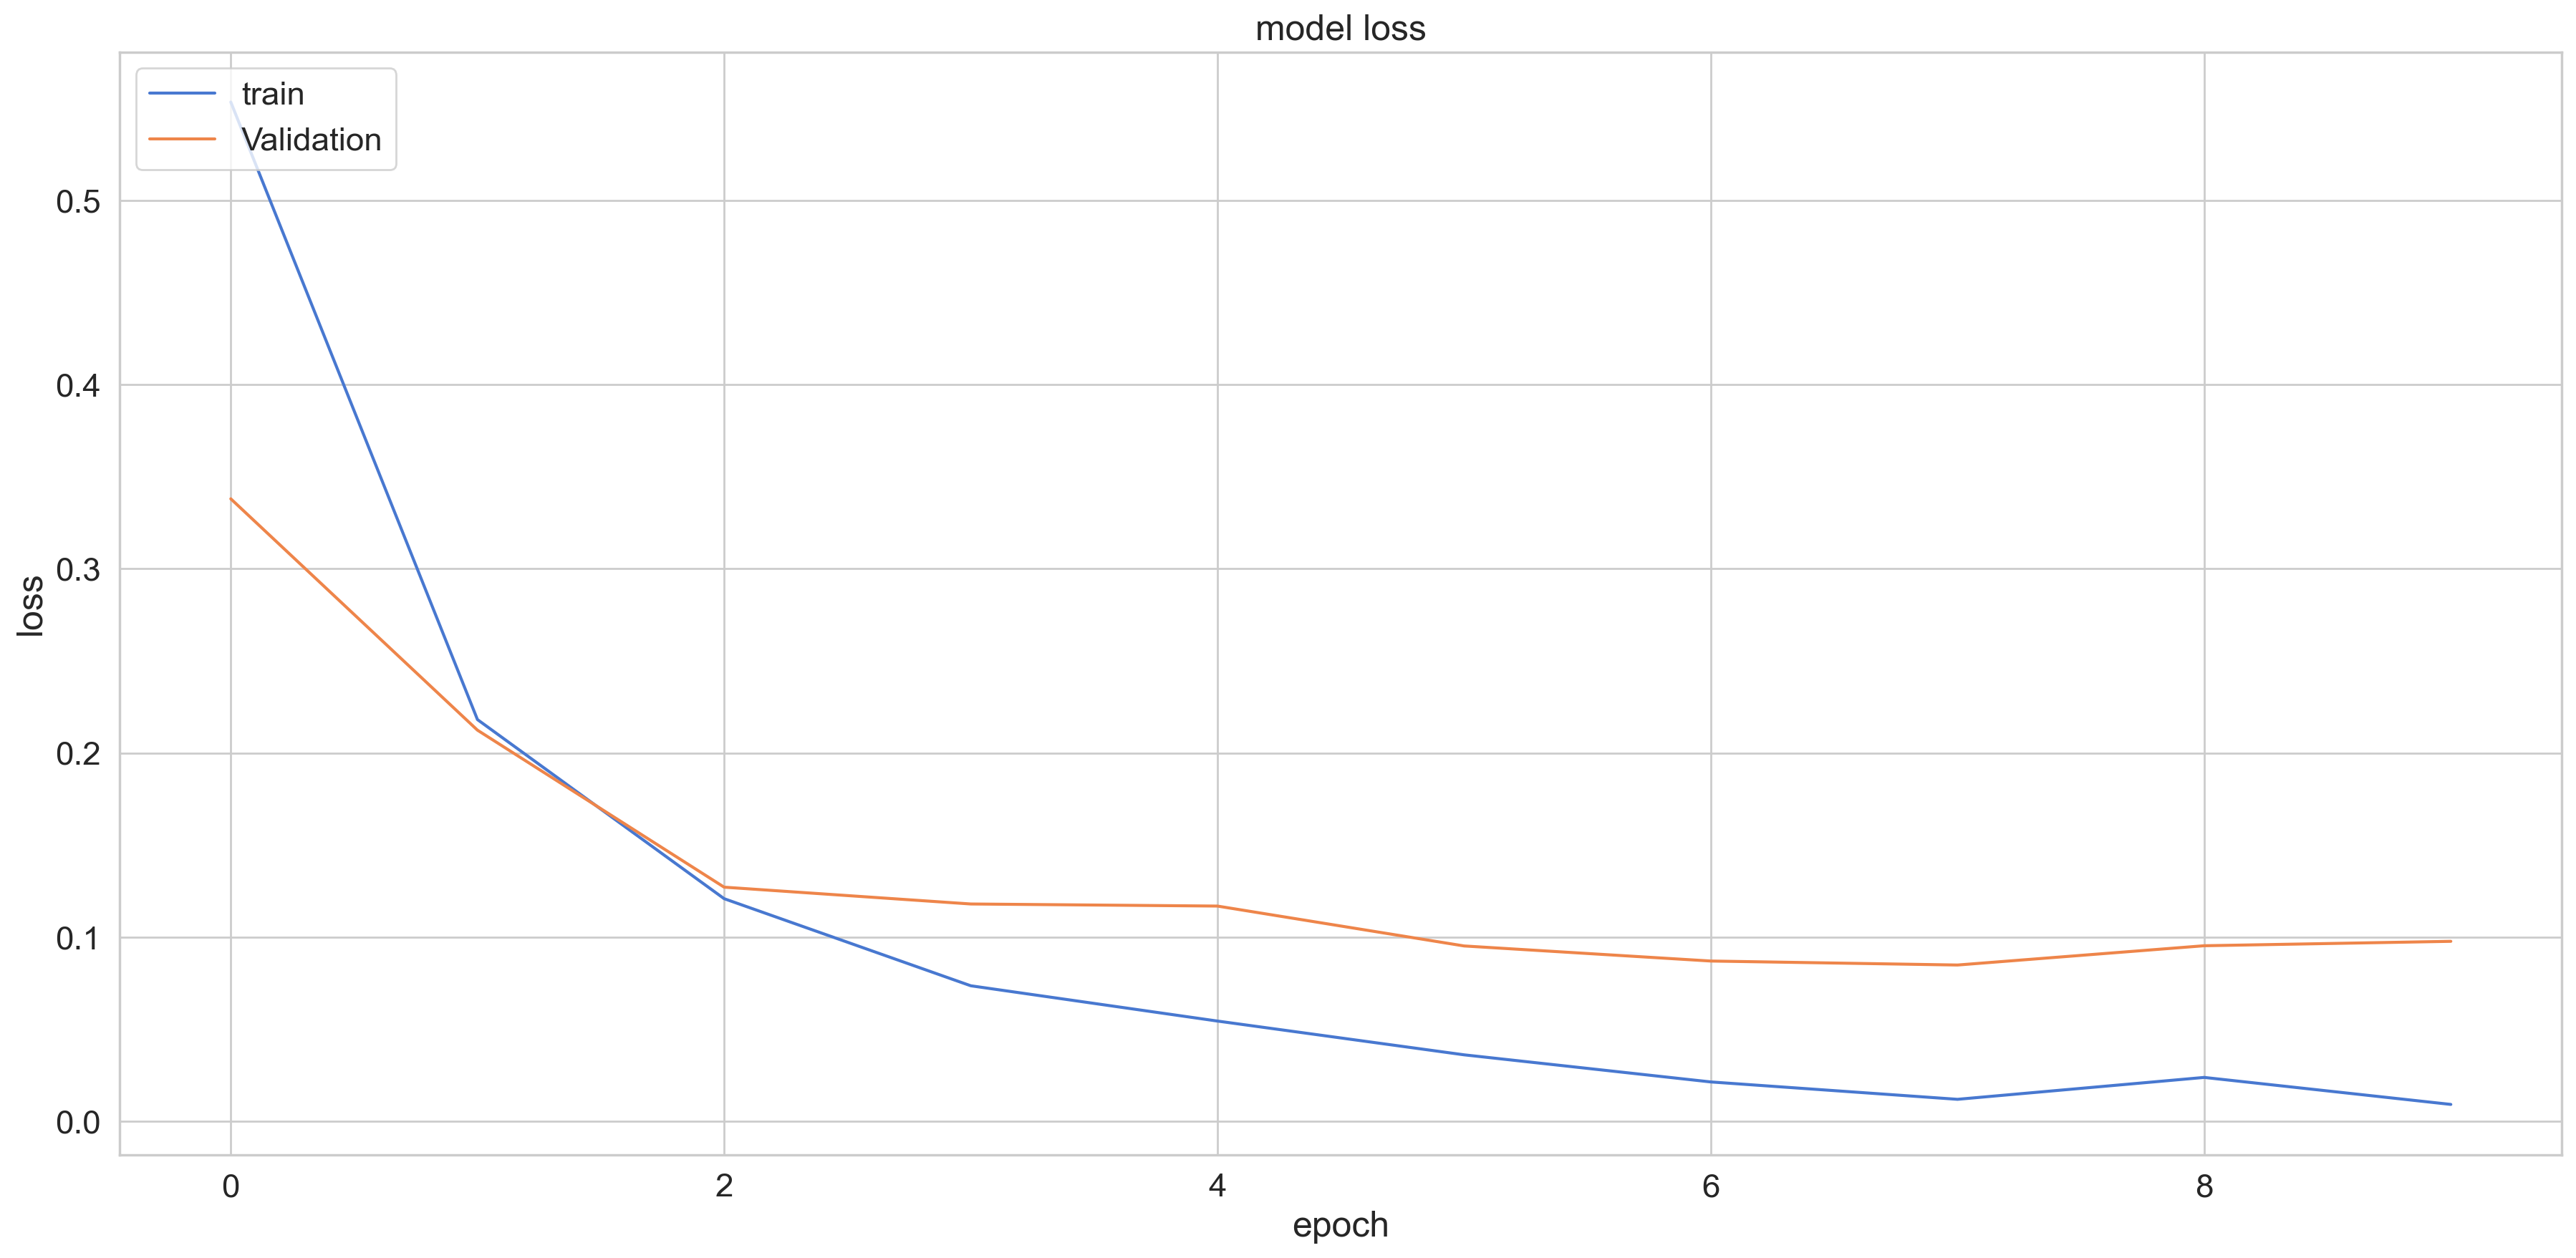

In [60]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

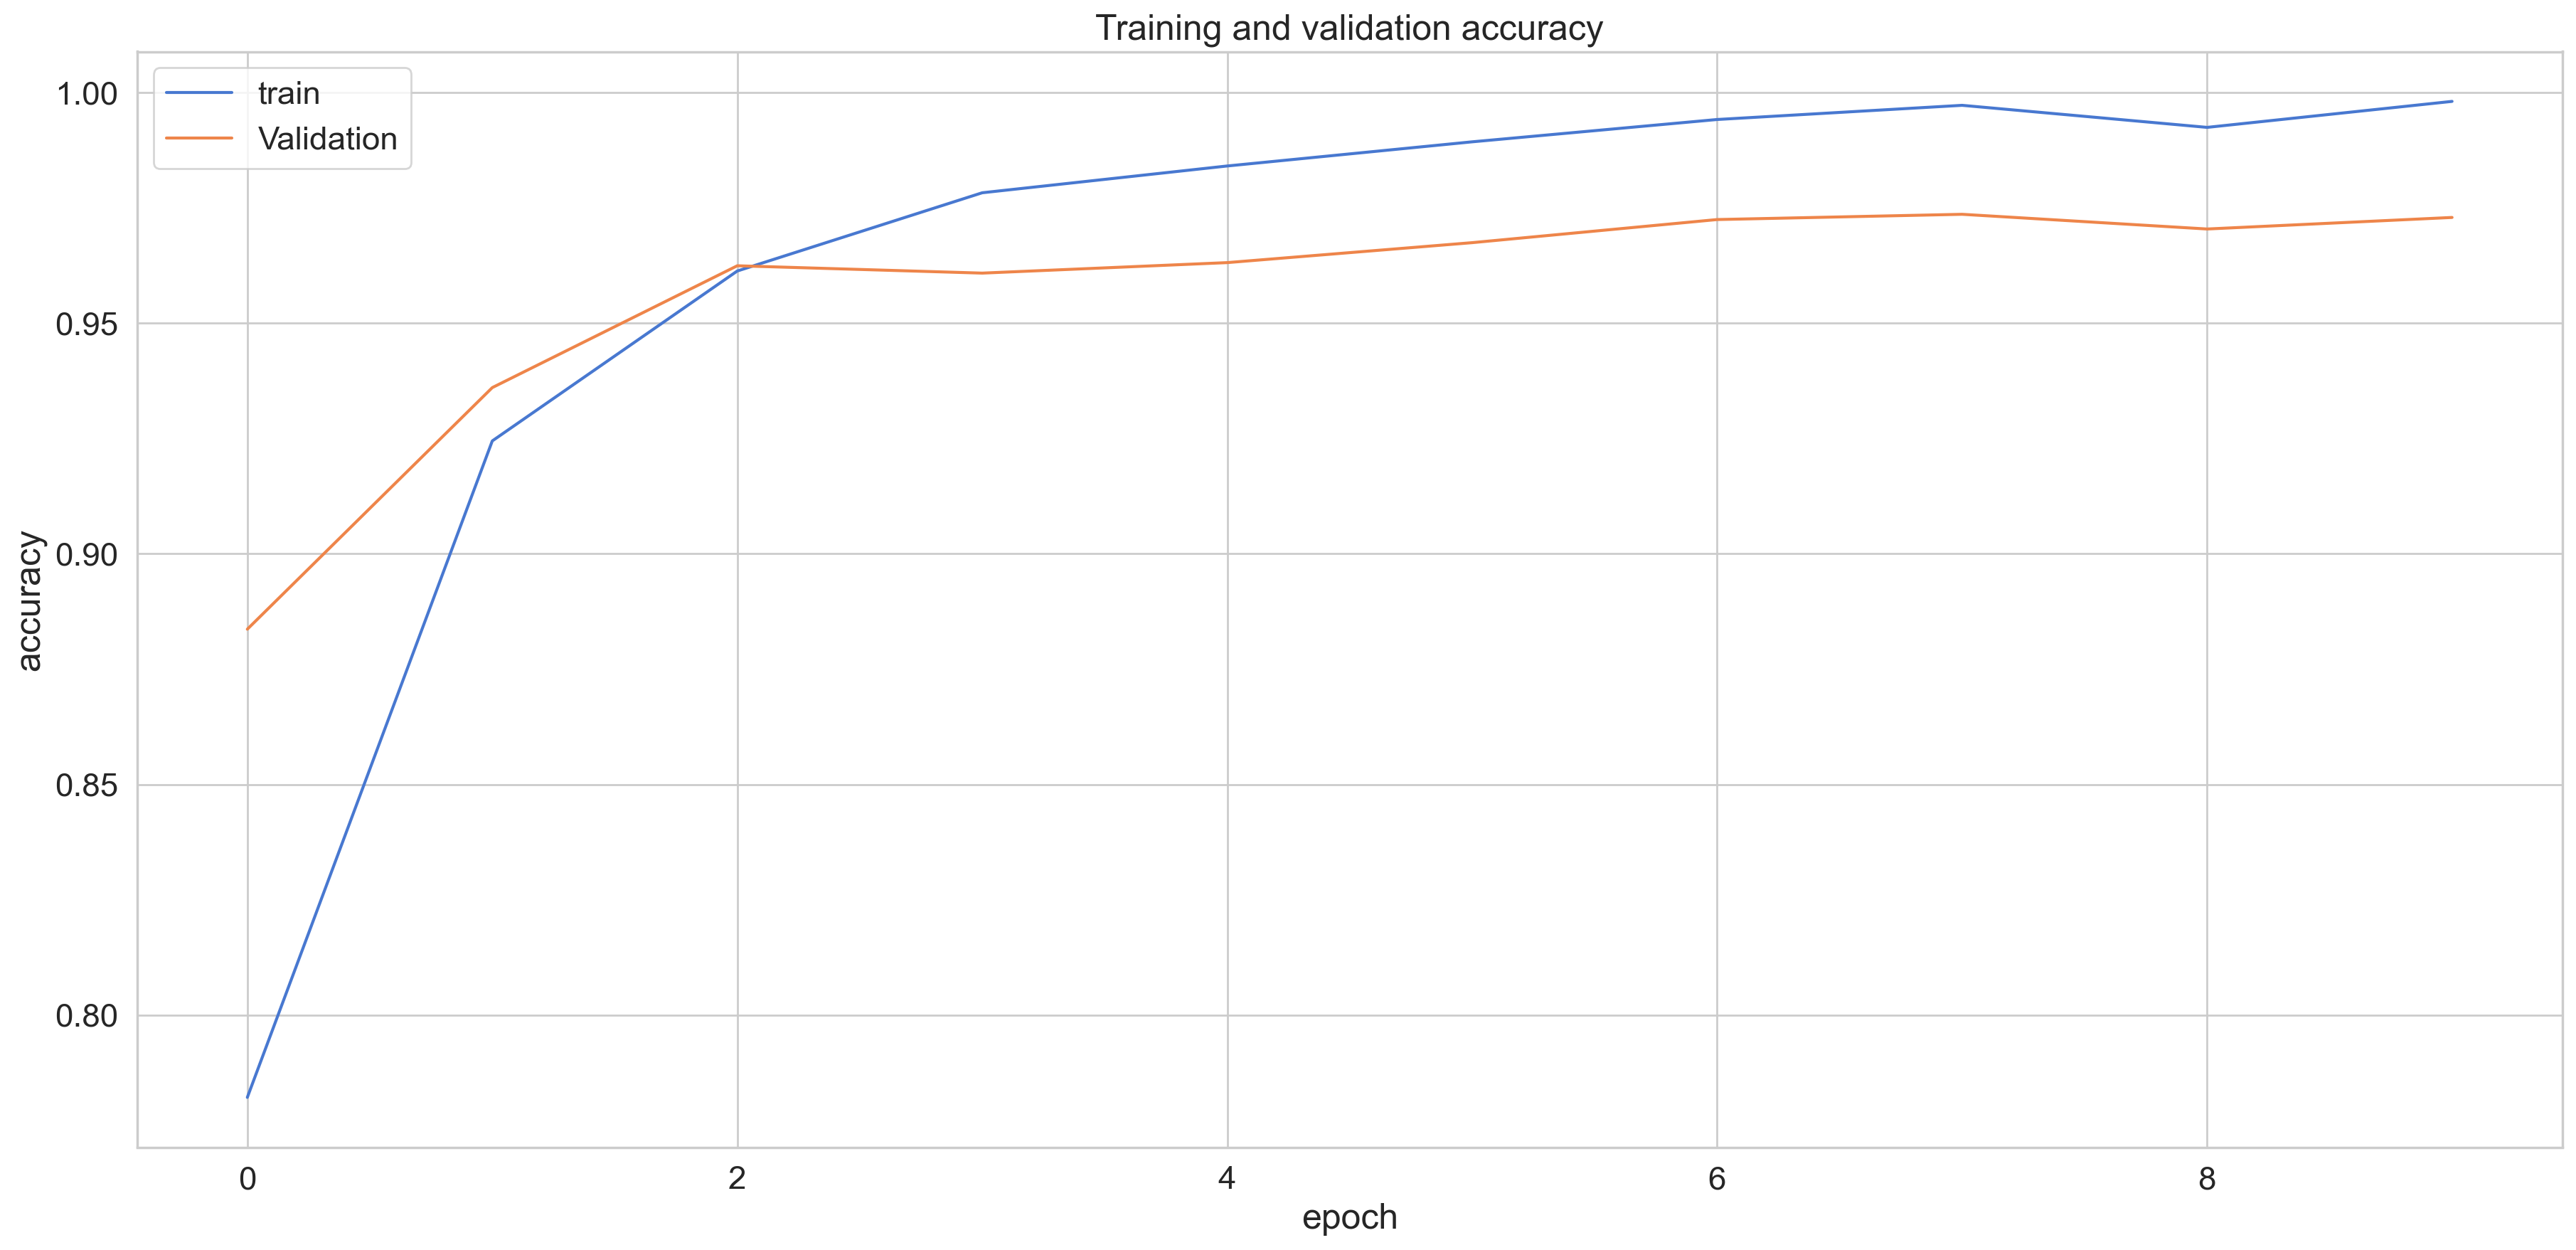

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

 44/172 [======>.......................] - ETA: 0s

2024-03-07 01:21:31.826207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 0s 2ms/step
f1_score =  0.9732063651511212
0.972864687670734
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2123
           1       0.99      0.99      0.99      1710
           2       0.90      0.92      0.91       614
           3       0.88      0.94      0.91       502
           4       0.99      0.98      0.98       300
           5       0.99      0.98      0.99       242

    accuracy                           0.97      5491
   macro avg       0.96      0.96      0.96      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

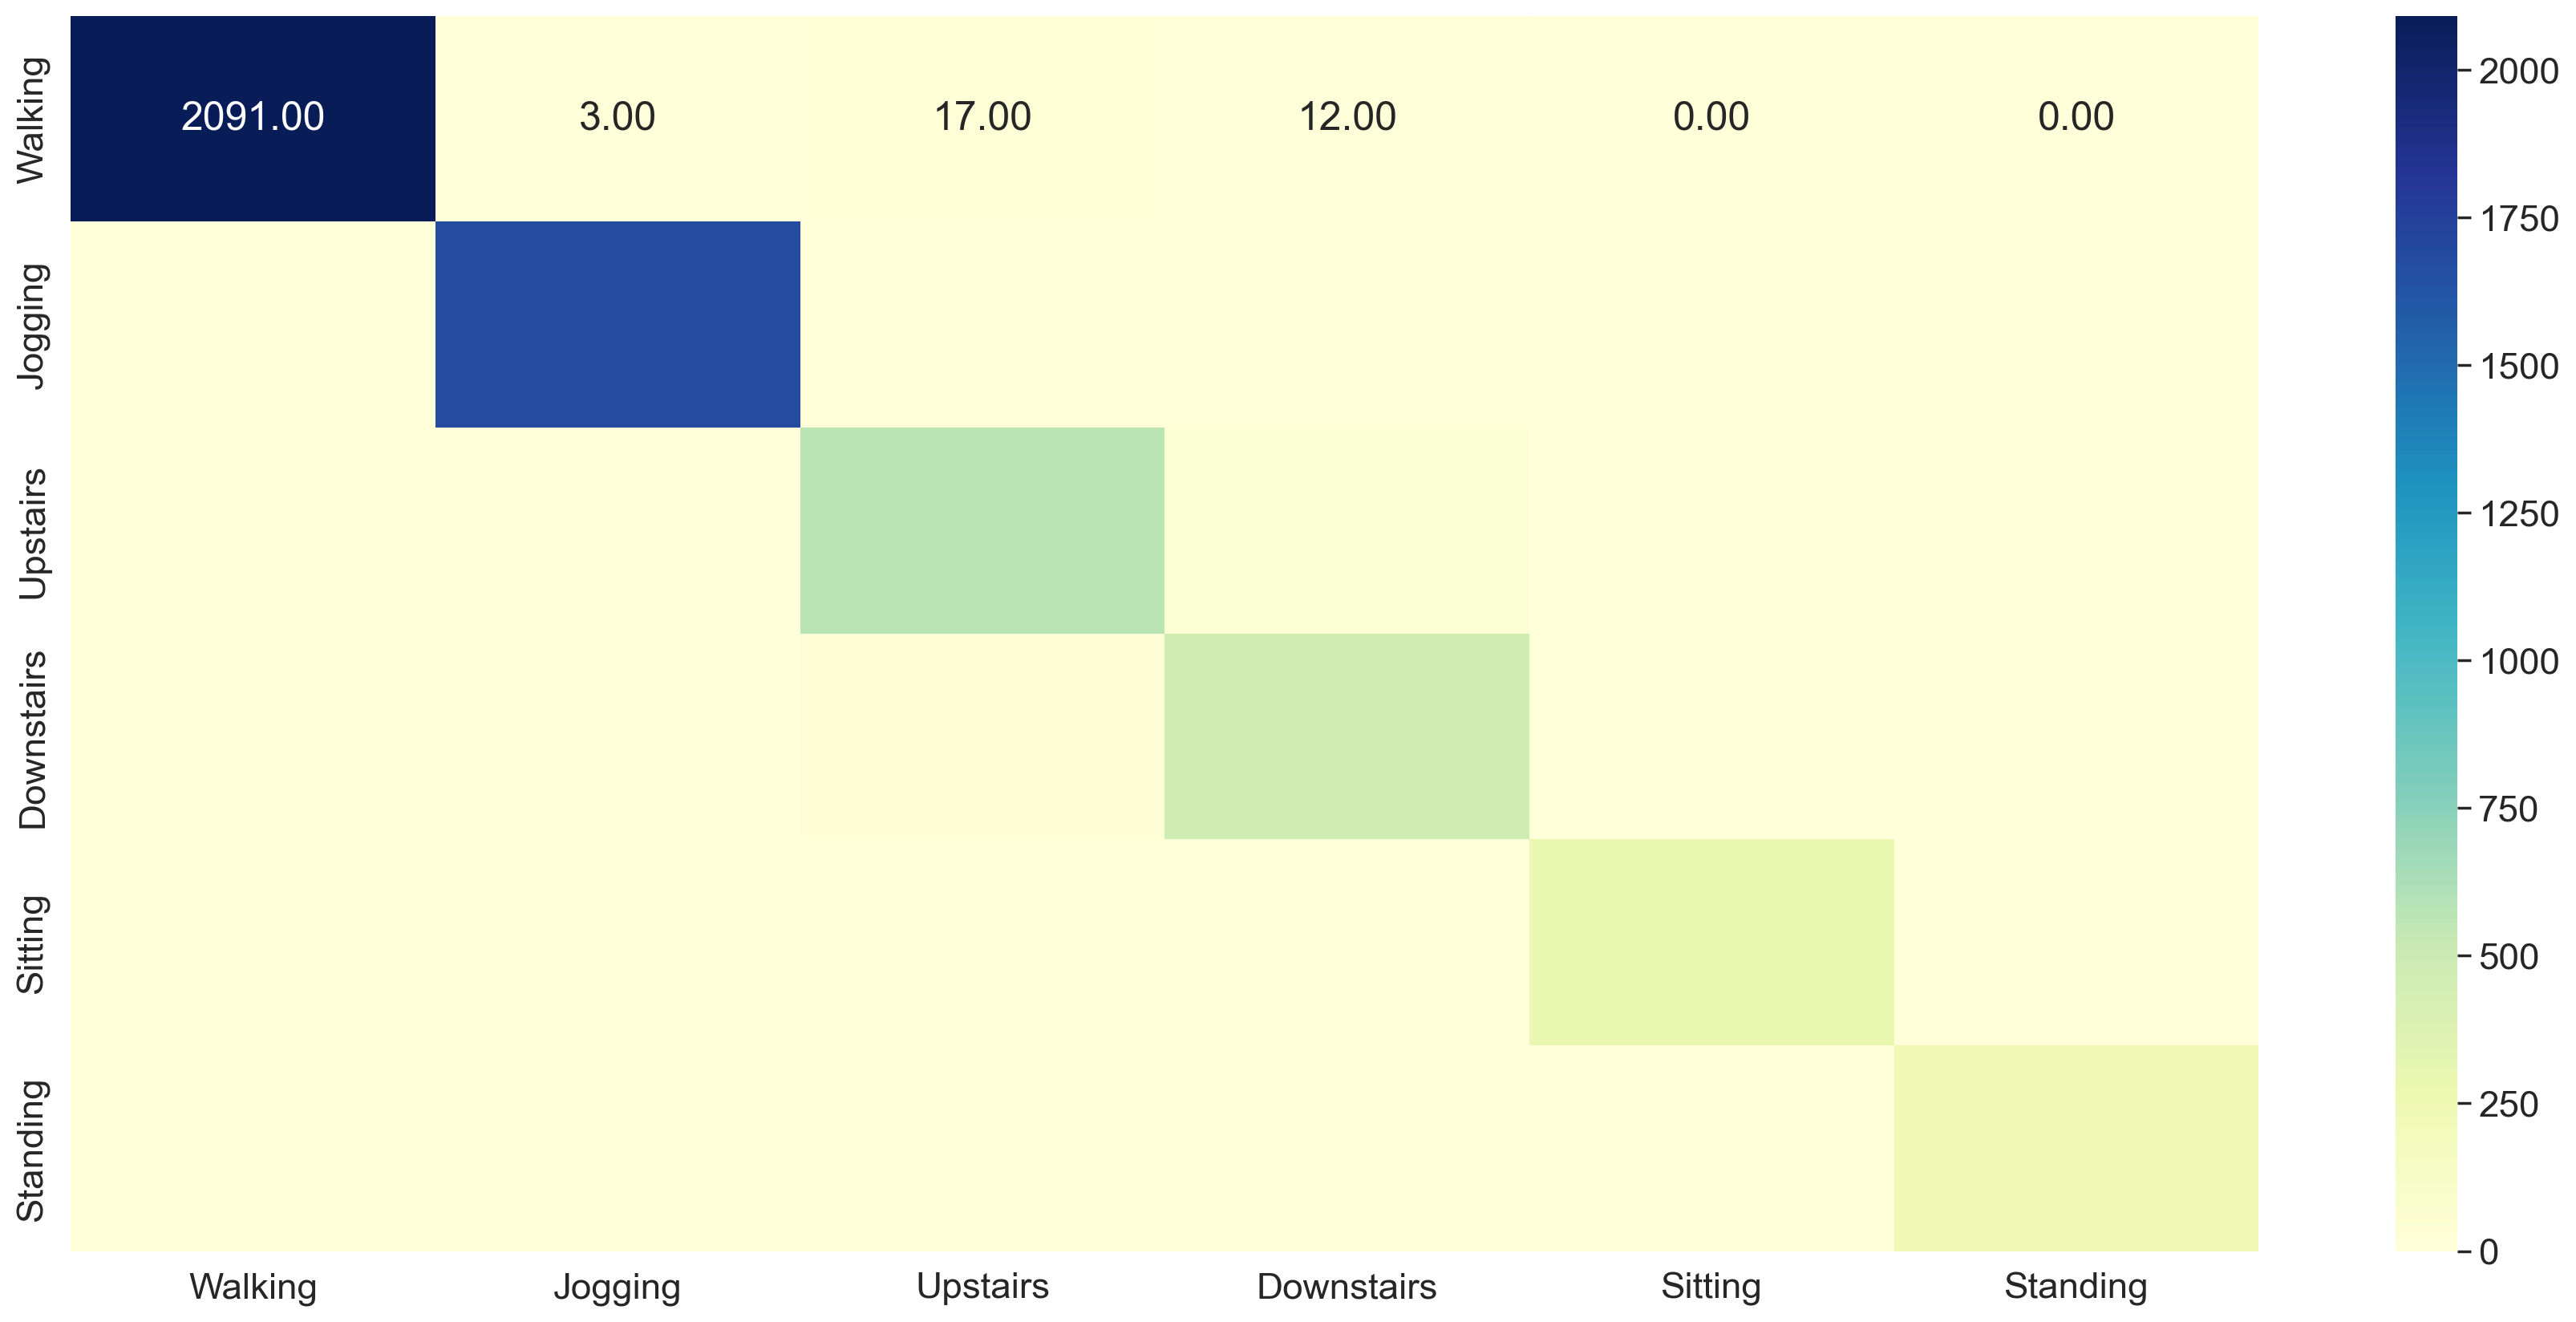

In [62]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [63]:

# Model 4
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 198, 64)           640       
                                                                 
 conv1d_11 (Conv1D)          (None, 196, 64)           12352     
                                                                 
 conv1d_12 (Conv1D)          (None, 194, 64)           12352     
                                                                 
 conv1d_13 (Conv1D)          (None, 192, 64)           12352     
                                                                 
 flatten_7 (Flatten)         (None, 12288)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               1572992   
                                                                 
 dense_15 (Dense)            (None, 6)                

In [64]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/10


2024-03-07 01:21:49.196833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 0.5430 - accuracy: 0.7925

2024-03-07 01:21:52.275442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - 4s 23ms/step - loss: 0.5430 - accuracy: 0.7925 - val_loss: 0.2949 - val_accuracy: 0.8841
Epoch 2/10
138/138 [==============================] - 3s 20ms/step - loss: 0.1990 - accuracy: 0.9319 - val_loss: 0.1584 - val_accuracy: 0.9479
Epoch 3/10
138/138 [==============================] - 3s 20ms/step - loss: 0.1077 - accuracy: 0.9638 - val_loss: 0.1750 - val_accuracy: 0.9403
Epoch 4/10
138/138 [==============================] - 3s 20ms/step - loss: 0.0660 - accuracy: 0.9789 - val_loss: 0.1297 - val_accuracy: 0.9597
Epoch 5/10
138/138 [==============================] - 3s 21ms/step - loss: 0.0487 - accuracy: 0.9848 - val_loss: 0.0886 - val_accuracy: 0.9690
Epoch 6/10
138/138 [==============================] - 3s 21ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.1670 - val_accuracy: 0.9549
Epoch 7/10
138/138 [==============================] - 3s 21ms/step - loss: 0.0251 - accuracy: 0.9929 - val_loss: 0.1089 - val_accuracy: 0.9658
Epoch 8/10

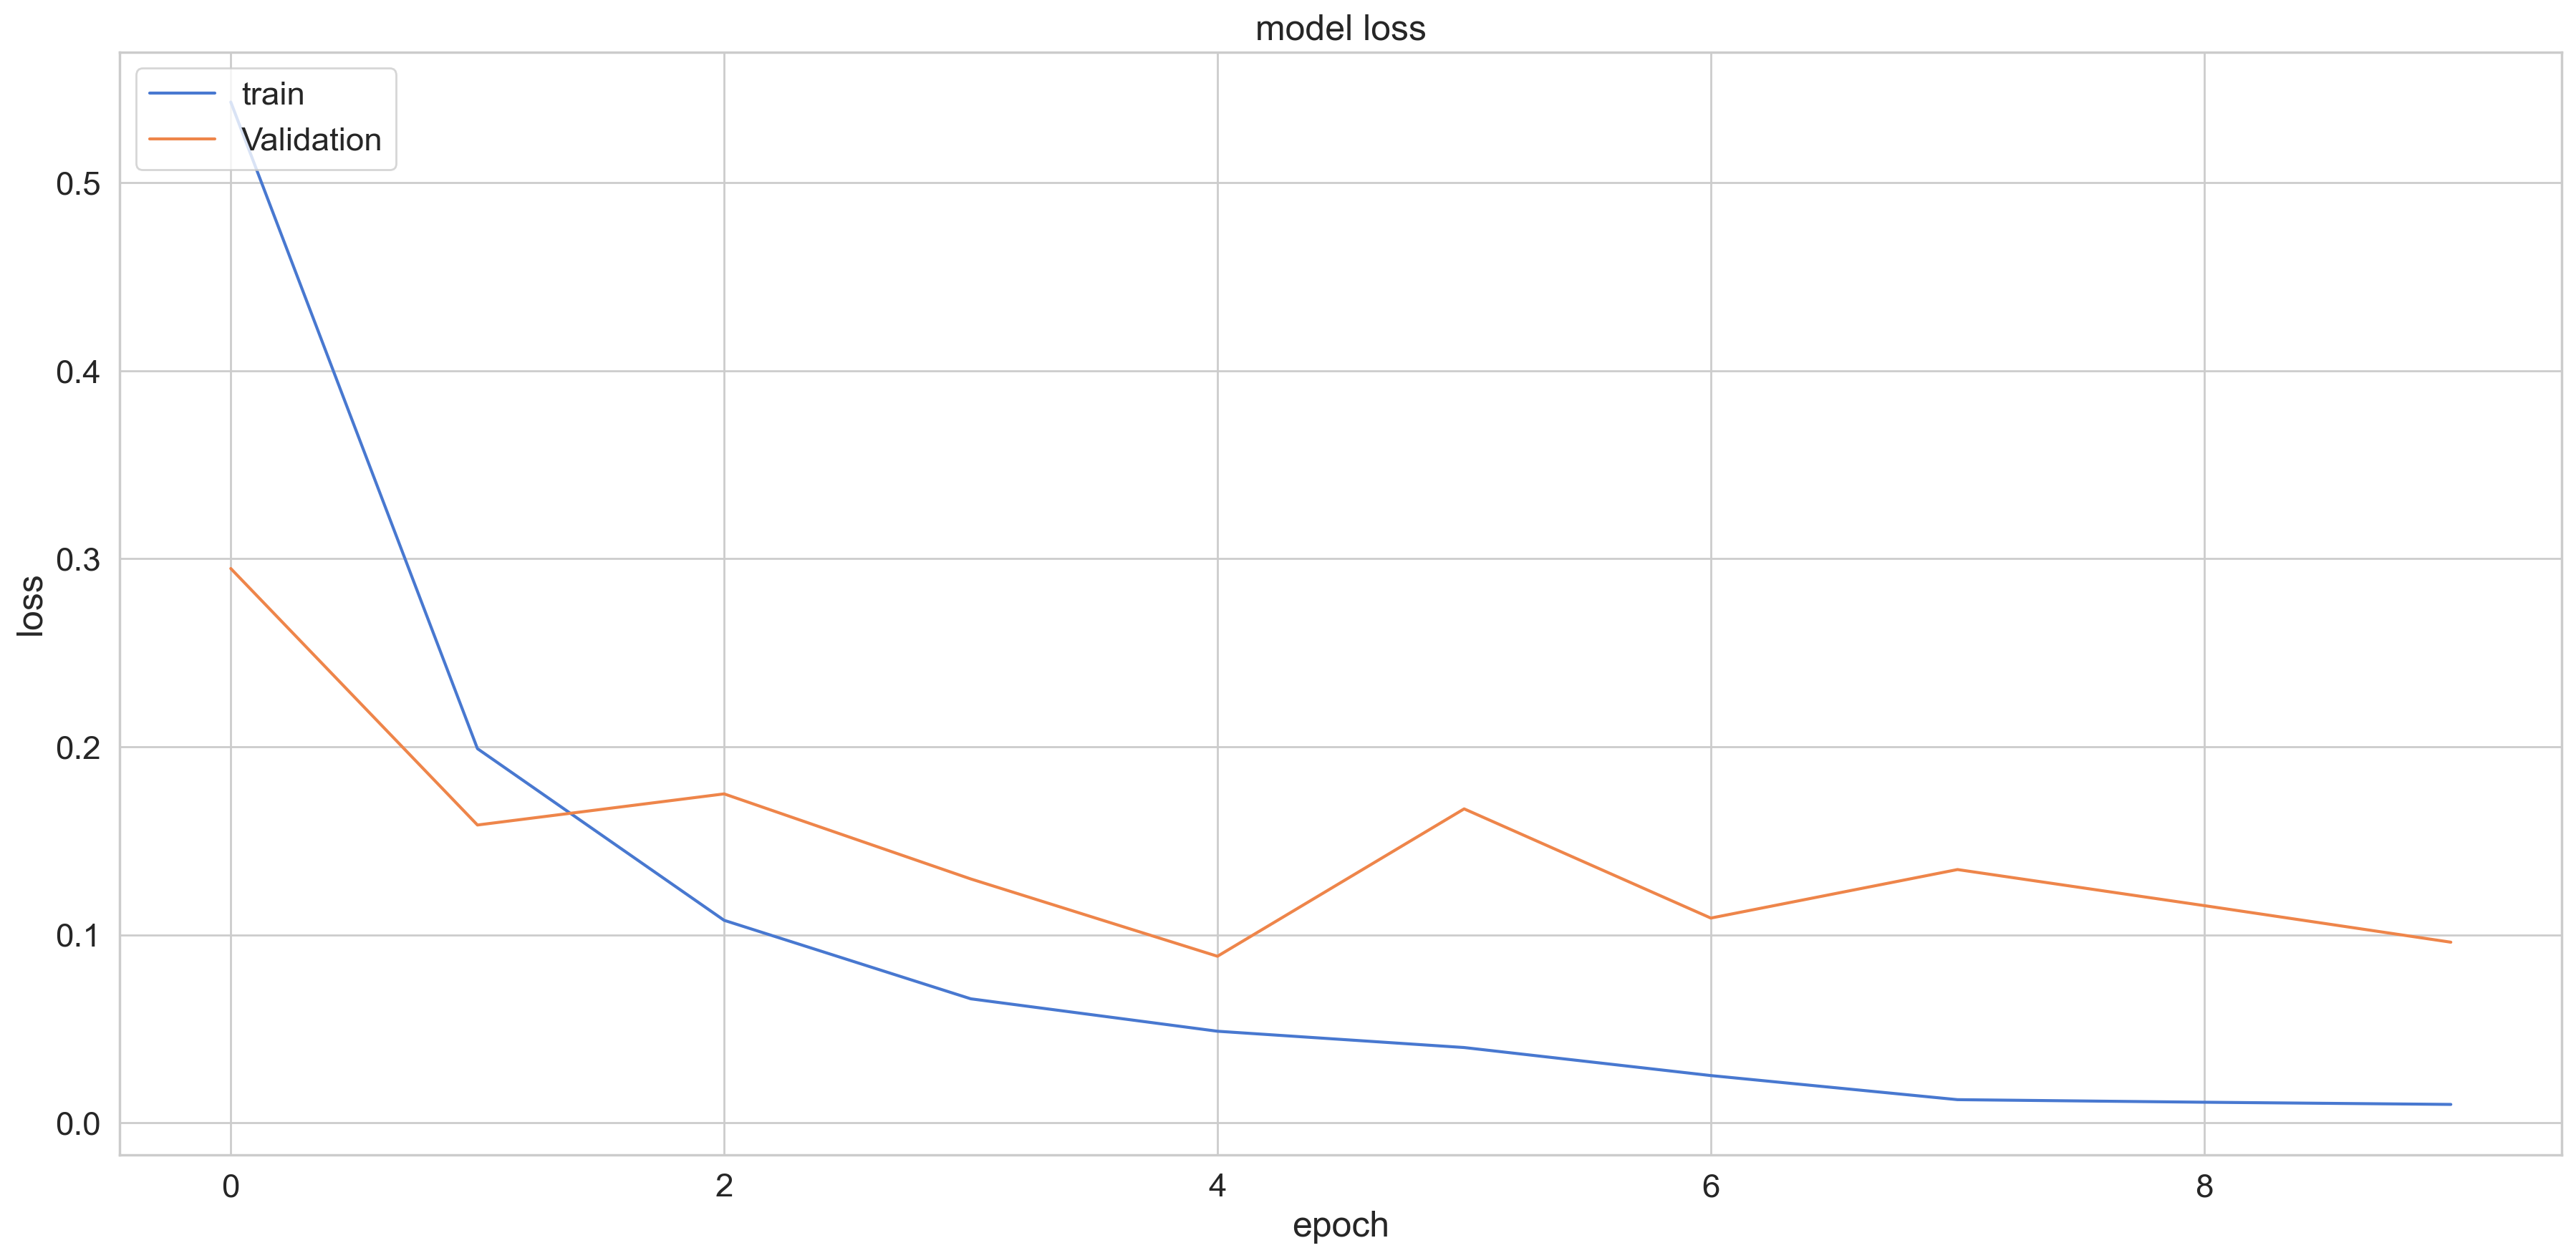

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

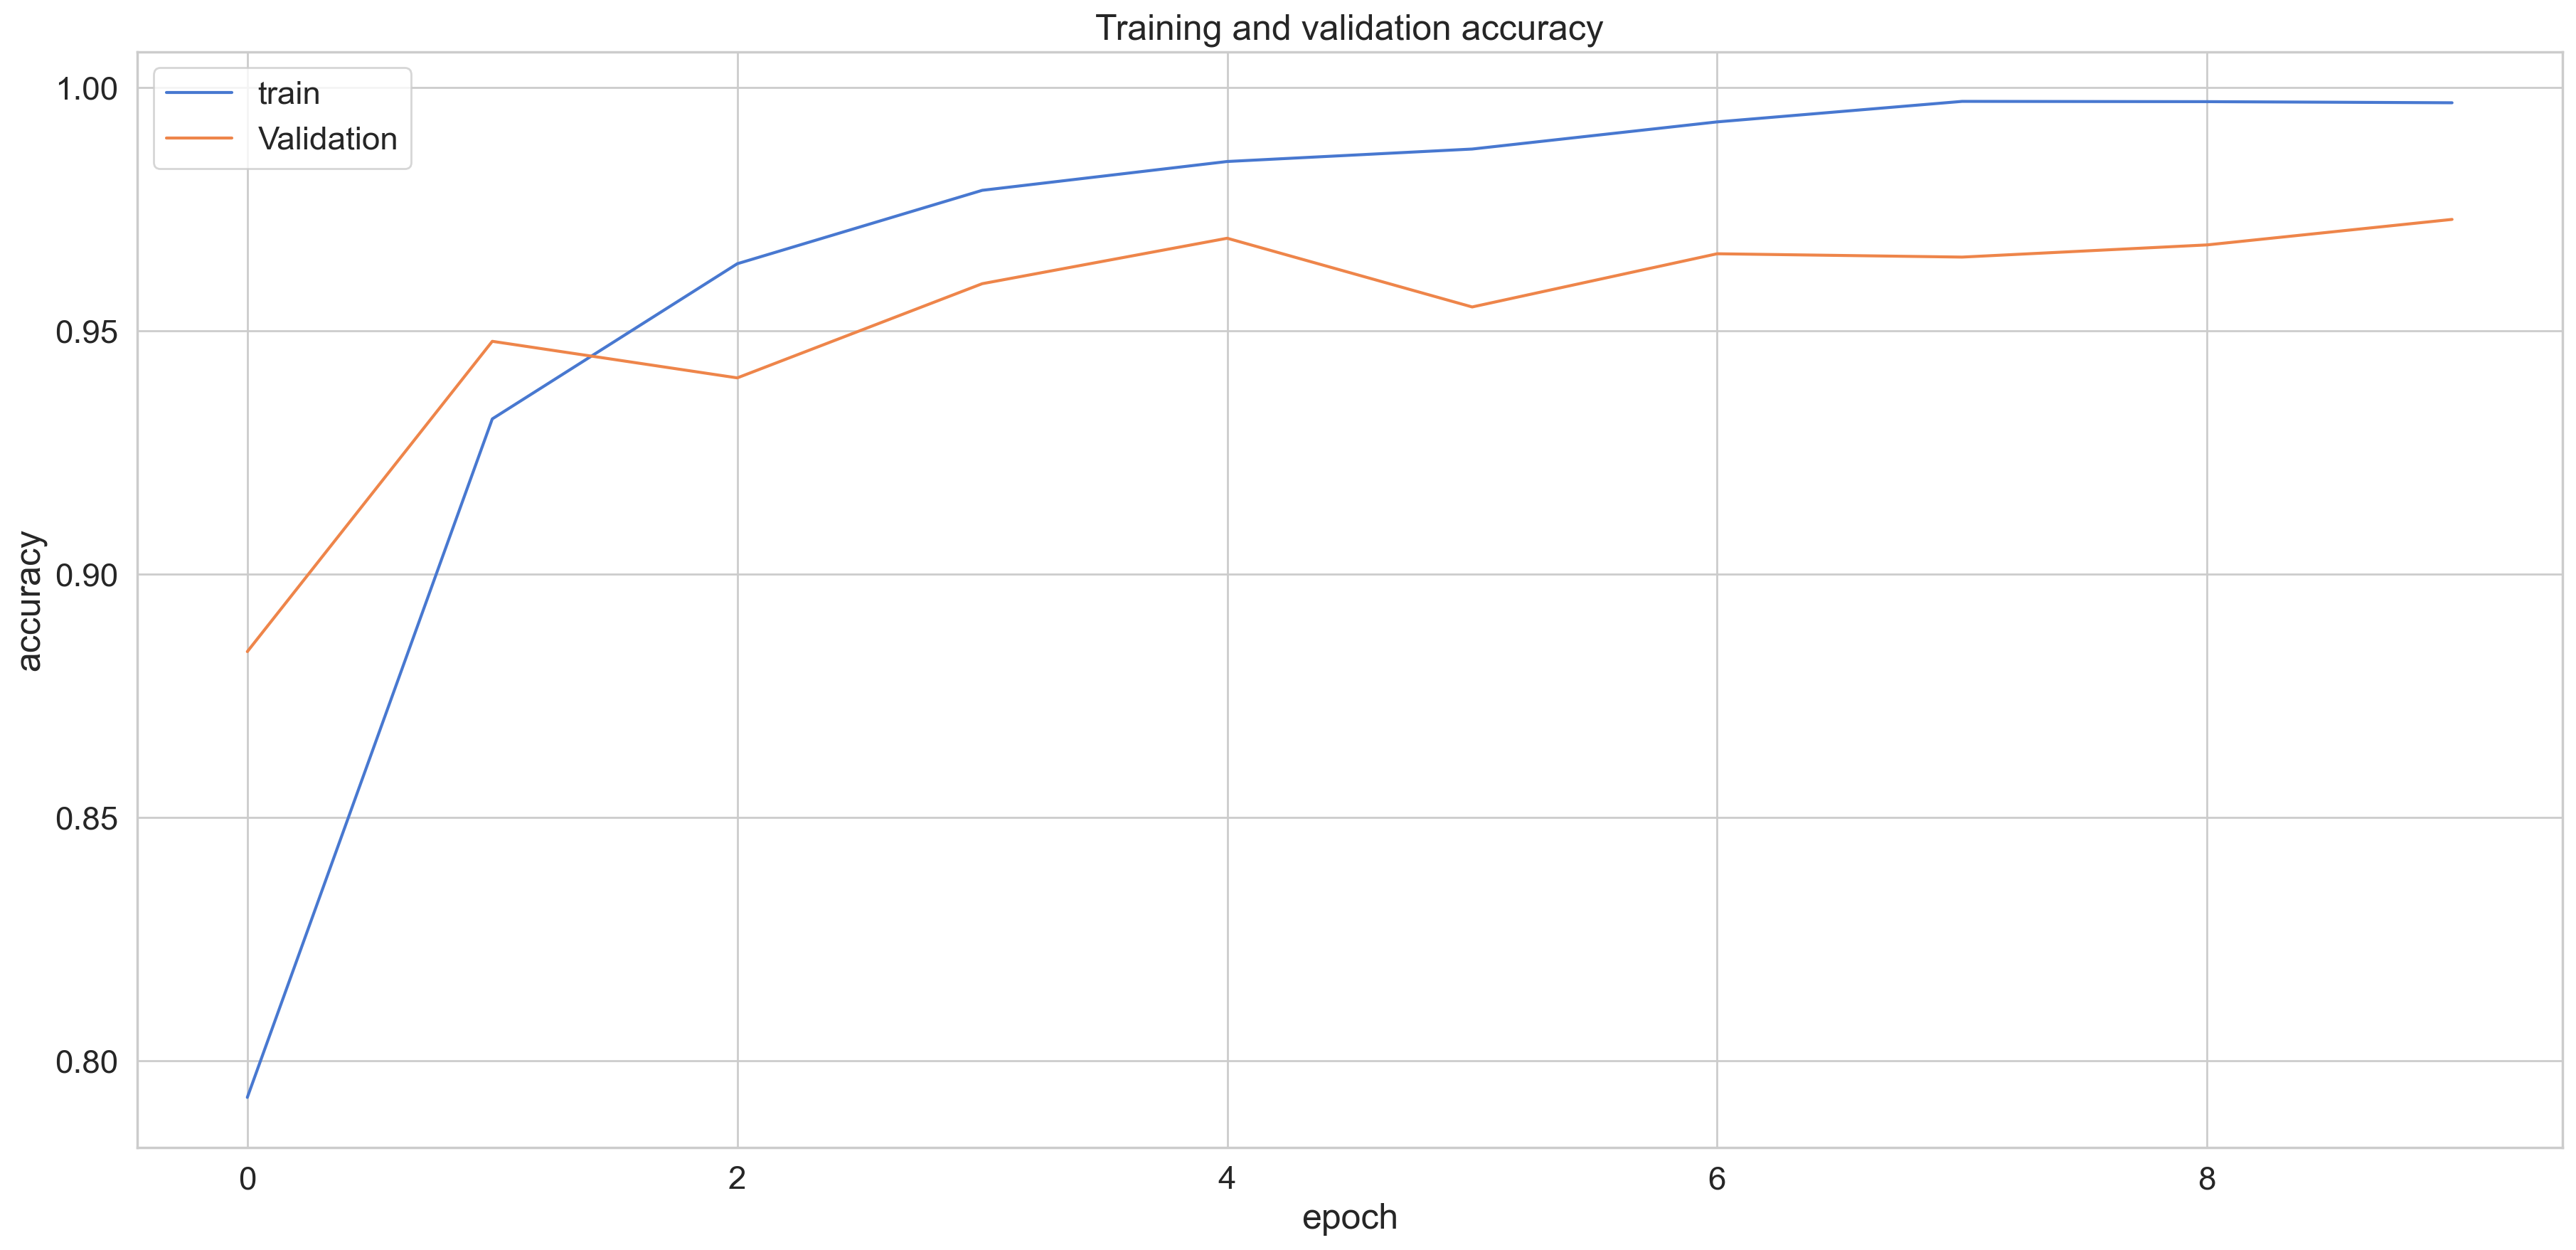

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

 38/172 [=====>........................] - ETA: 0s

2024-03-07 01:23:06.266202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 1s 3ms/step
f1_score =  0.9755513550532485
0.9755964305226734
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       0.99      0.99      0.99      1710
           2       0.96      0.86      0.91       614
           3       0.86      0.98      0.92       502
           4       0.99      0.98      0.98       300
           5       0.99      0.98      0.99       242

    accuracy                           0.98      5491
   macro avg       0.96      0.96      0.96      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

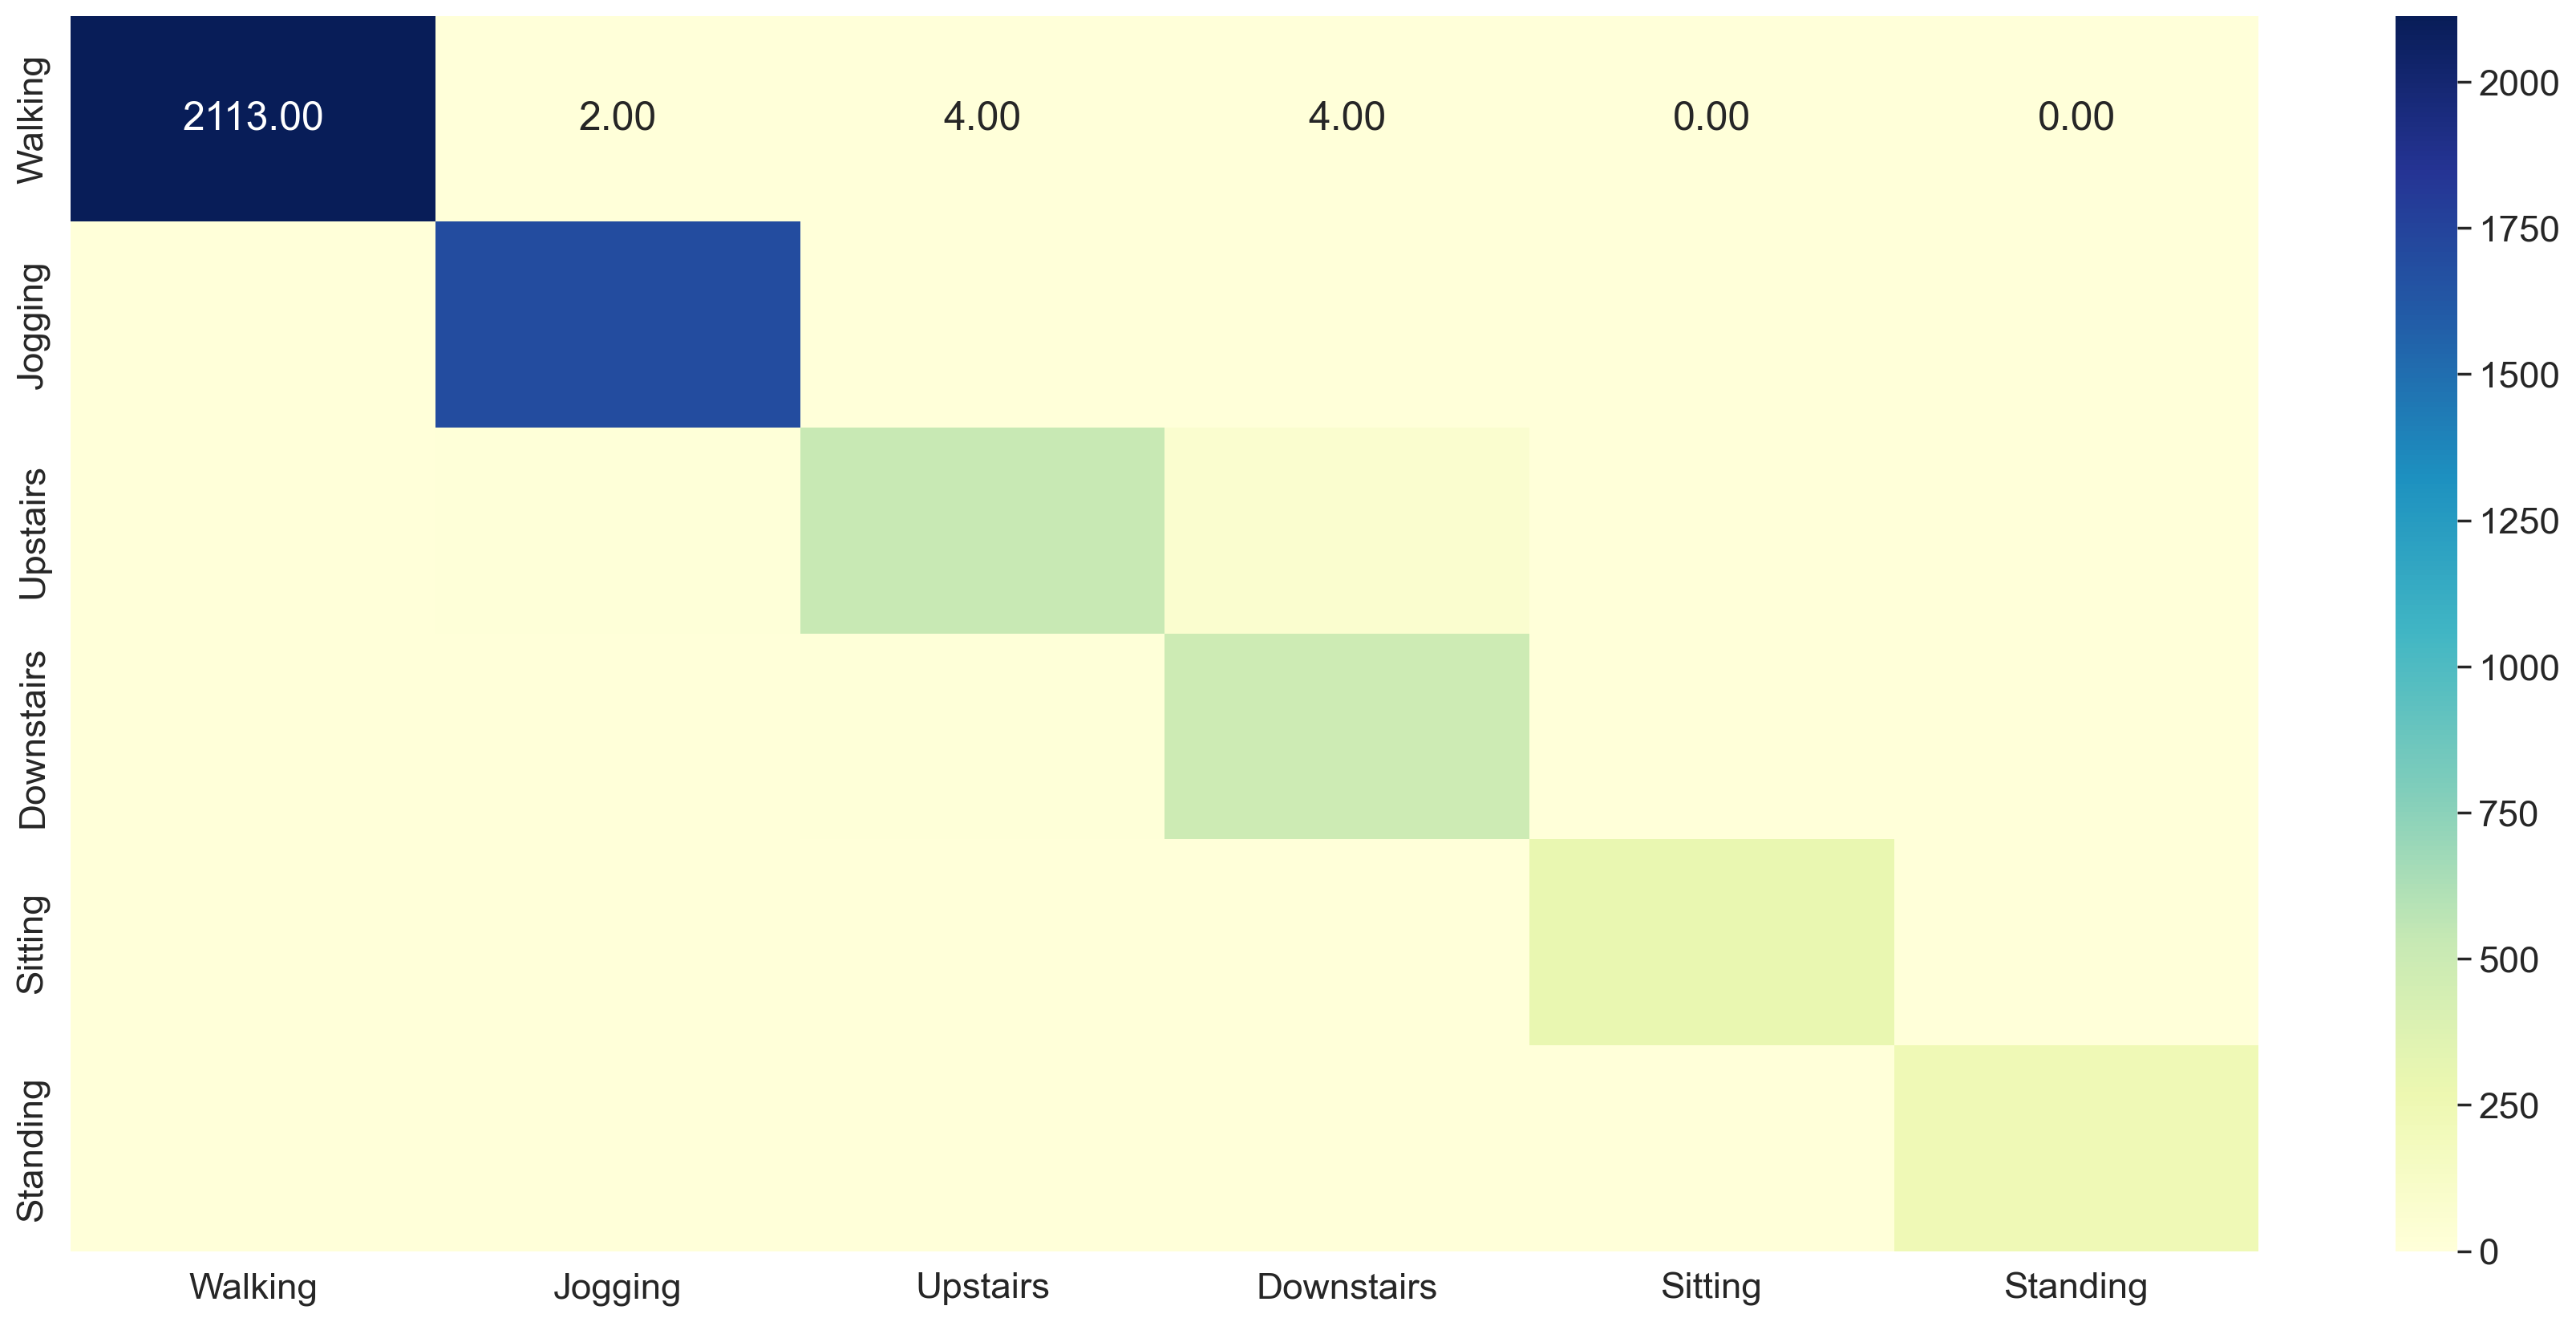

In [67]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [68]:
# Model 5
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

#model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 198, 64)           640       
                                                                 
 conv1d_15 (Conv1D)          (None, 196, 64)           12352     
                                                                 
 conv1d_16 (Conv1D)          (None, 194, 64)           12352     
                                                                 
 conv1d_17 (Conv1D)          (None, 192, 64)           12352     
                                                                 
 conv1d_18 (Conv1D)          (None, 190, 64)           12352     
                                                                 
 flatten_8 (Flatten)         (None, 12160)             0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [69]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/10


2024-03-07 01:23:34.301157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 0.5226 - accuracy: 0.7953

2024-03-07 01:23:37.671082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - 4s 27ms/step - loss: 0.5226 - accuracy: 0.7953 - val_loss: 0.4073 - val_accuracy: 0.8593
Epoch 2/10
138/138 [==============================] - 3s 22ms/step - loss: 0.1985 - accuracy: 0.9308 - val_loss: 0.1927 - val_accuracy: 0.9331
Epoch 3/10
138/138 [==============================] - 3s 22ms/step - loss: 0.1104 - accuracy: 0.9631 - val_loss: 0.1305 - val_accuracy: 0.9561
Epoch 4/10
138/138 [==============================] - 3s 22ms/step - loss: 0.0725 - accuracy: 0.9752 - val_loss: 0.0958 - val_accuracy: 0.9693
Epoch 5/10
138/138 [==============================] - 3s 22ms/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.1398 - val_accuracy: 0.9602
Epoch 6/10
138/138 [==============================] - 3s 22ms/step - loss: 0.0394 - accuracy: 0.9870 - val_loss: 0.1171 - val_accuracy: 0.9636
Epoch 7/10
138/138 [==============================] - 3s 22ms/step - loss: 0.0324 - accuracy: 0.9903 - val_loss: 0.0607 - val_accuracy: 0.9816
Epoch 8/10

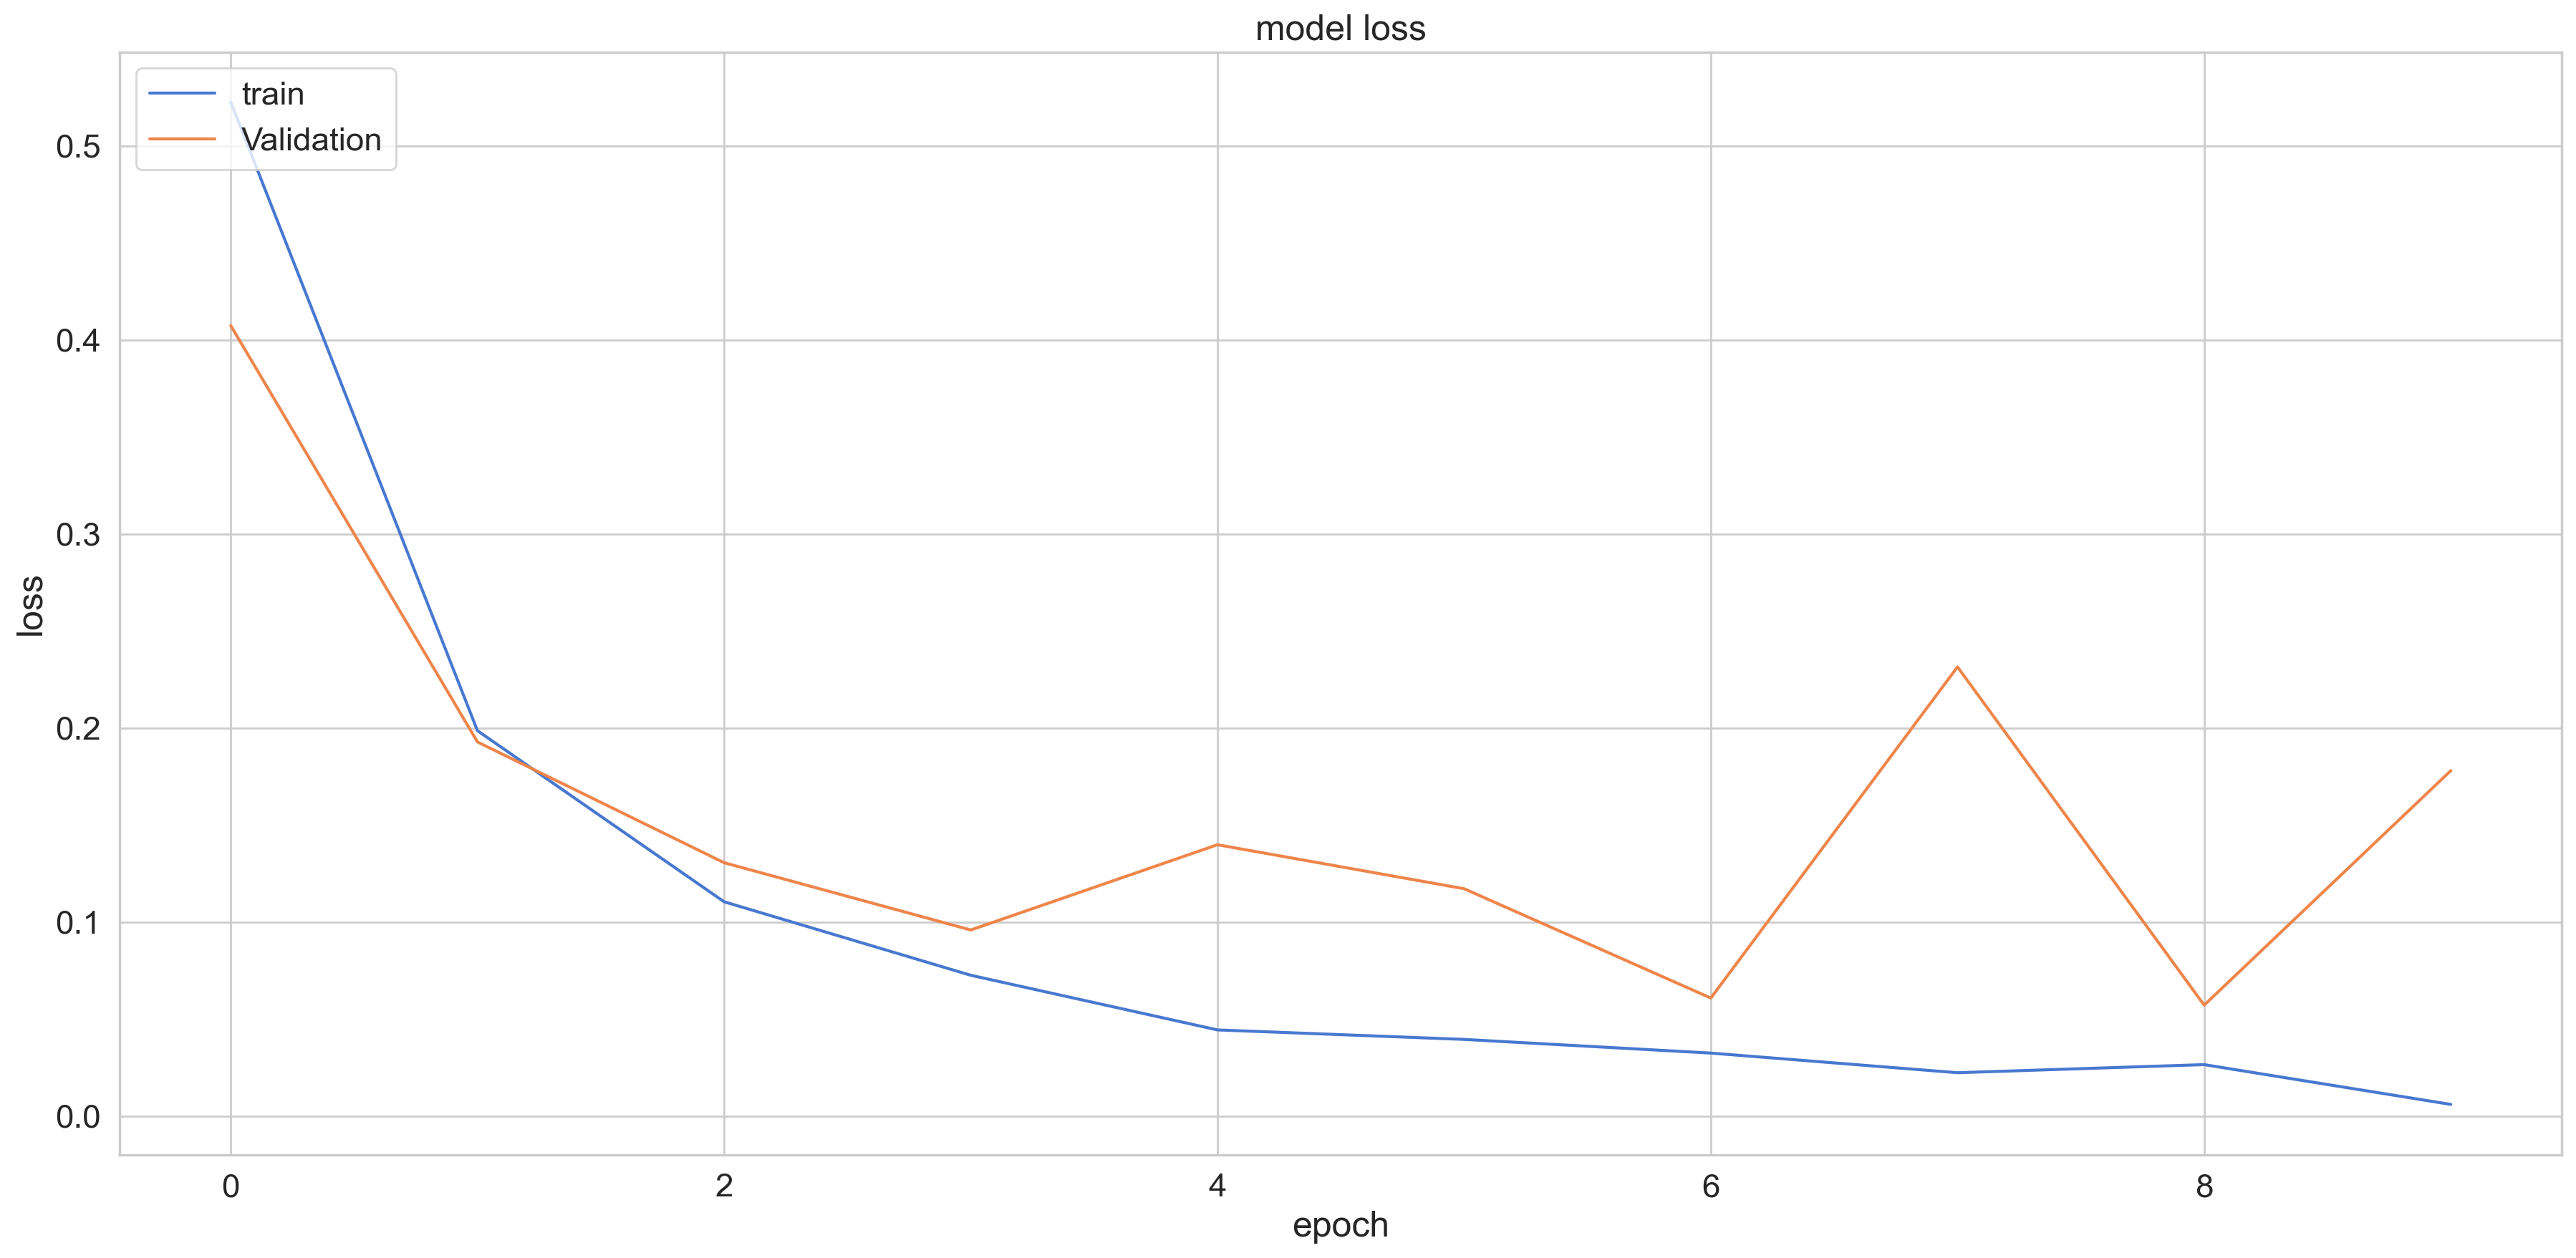

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

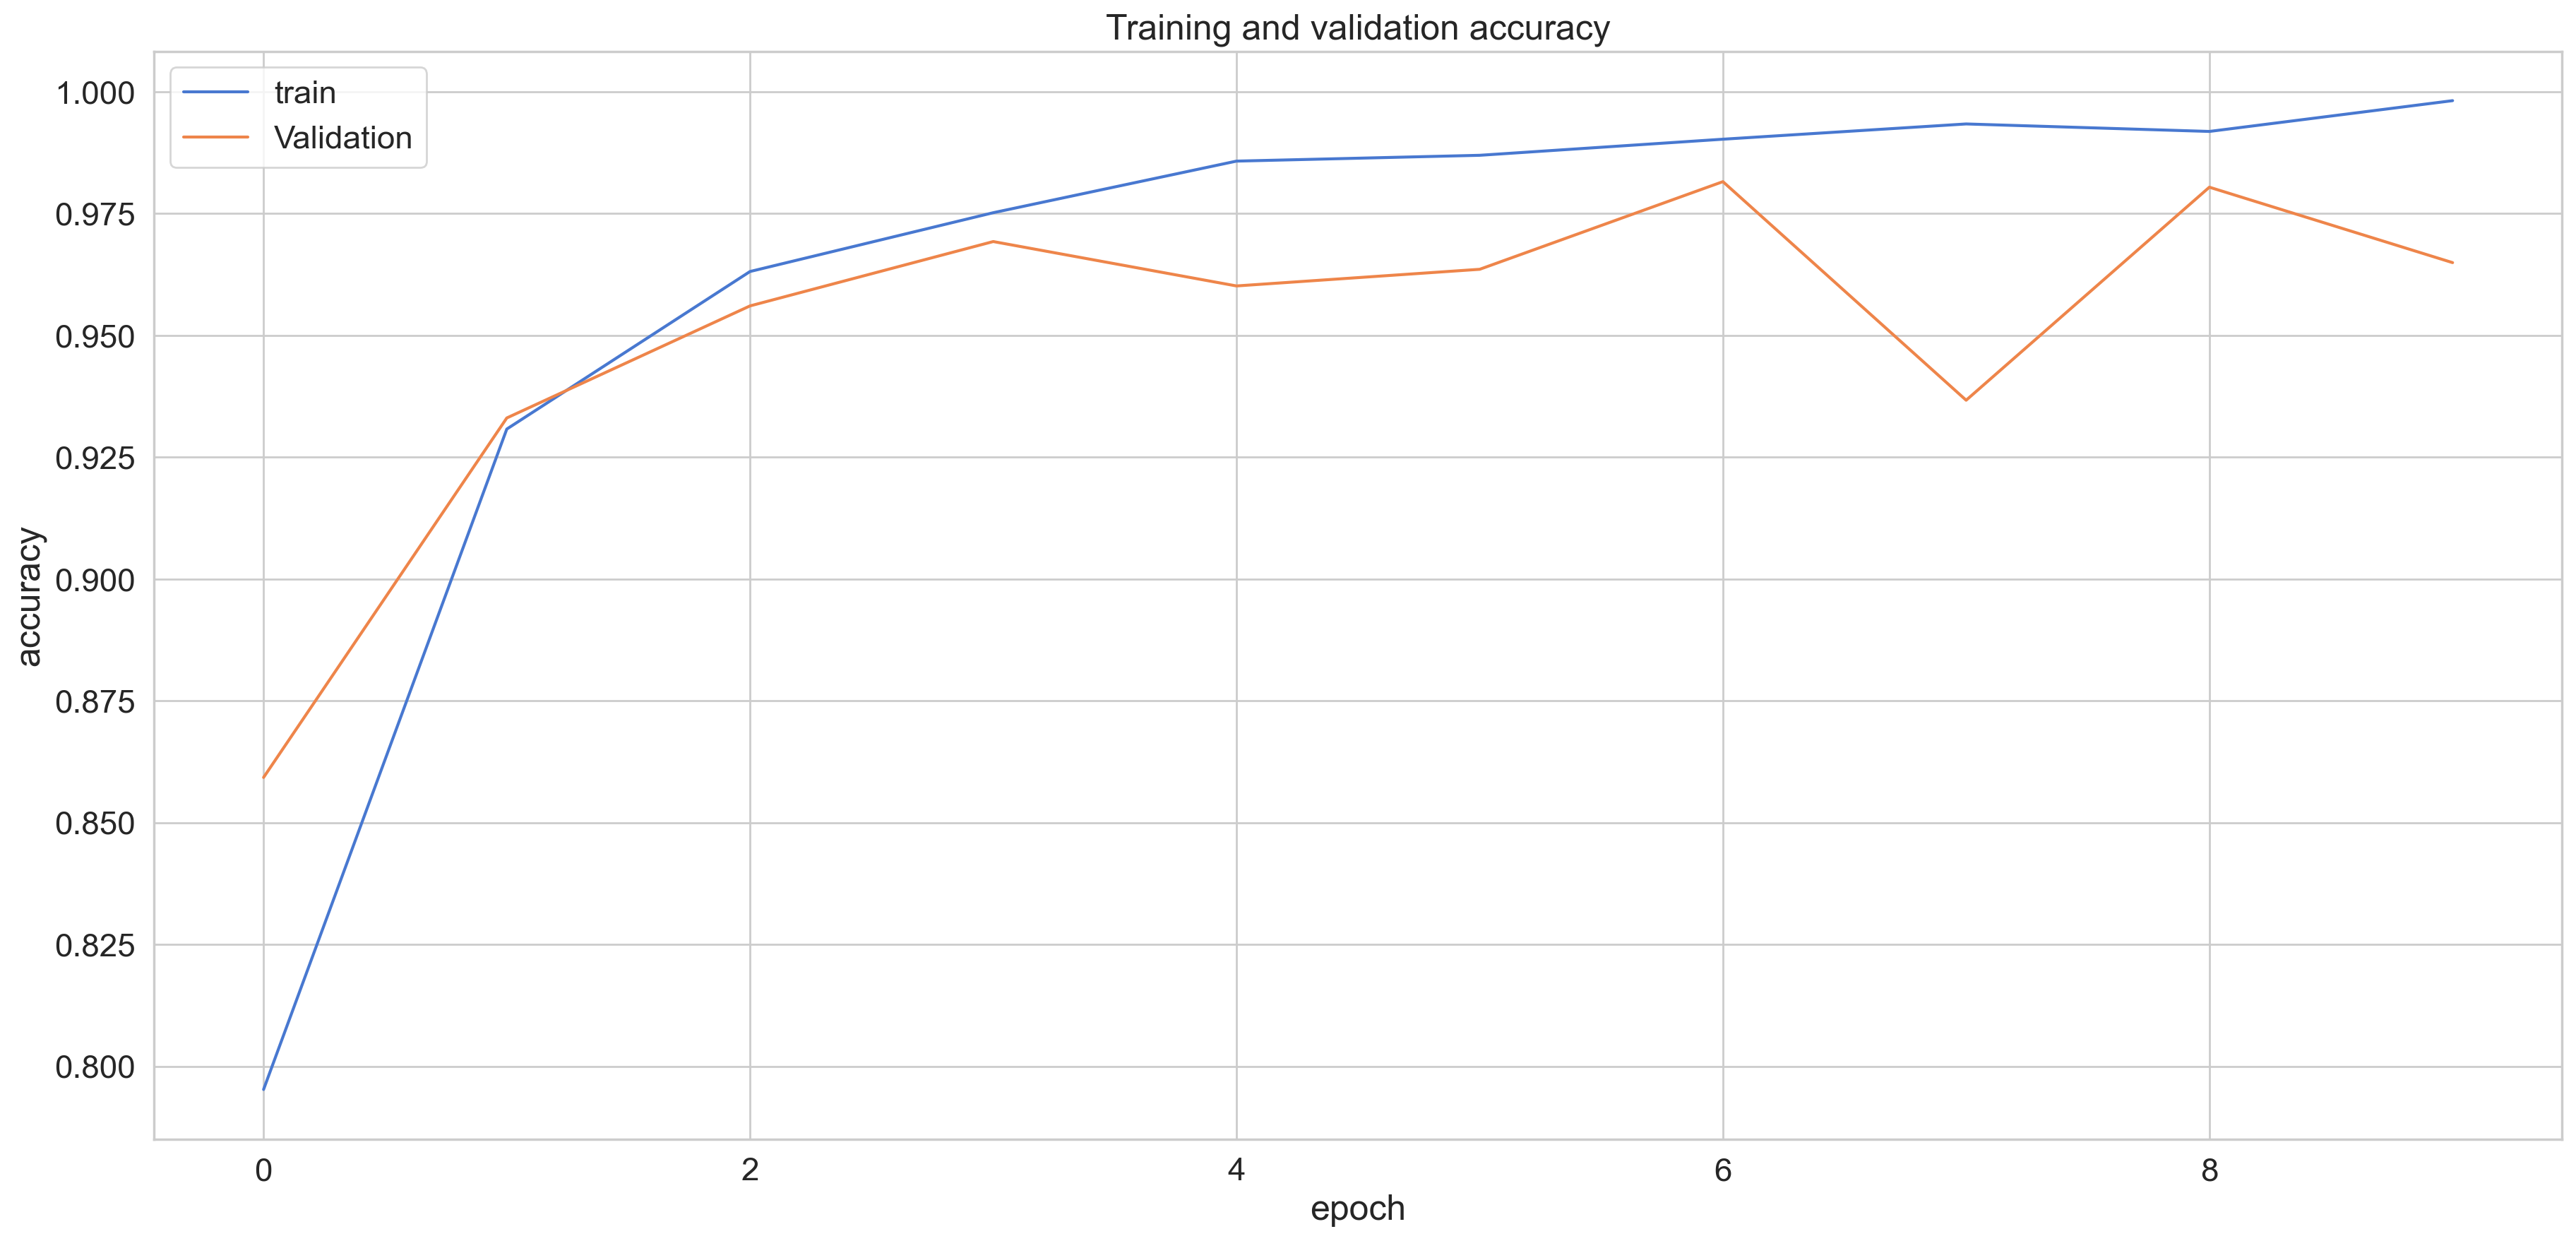

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

 37/172 [=====>........................] - ETA: 0s

2024-03-07 01:24:36.028540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 1s 3ms/step
f1_score =  0.9637741416080955
0.964487342924786
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       0.93      1.00      0.96      1710
           2       0.94      0.84      0.89       614
           3       0.95      0.86      0.90       502
           4       0.99      0.98      0.98       300
           5       0.99      0.99      0.99       242

    accuracy                           0.96      5491
   macro avg       0.97      0.94      0.95      5491
weighted avg       0.96      0.96      0.96      5491



<Axes: >

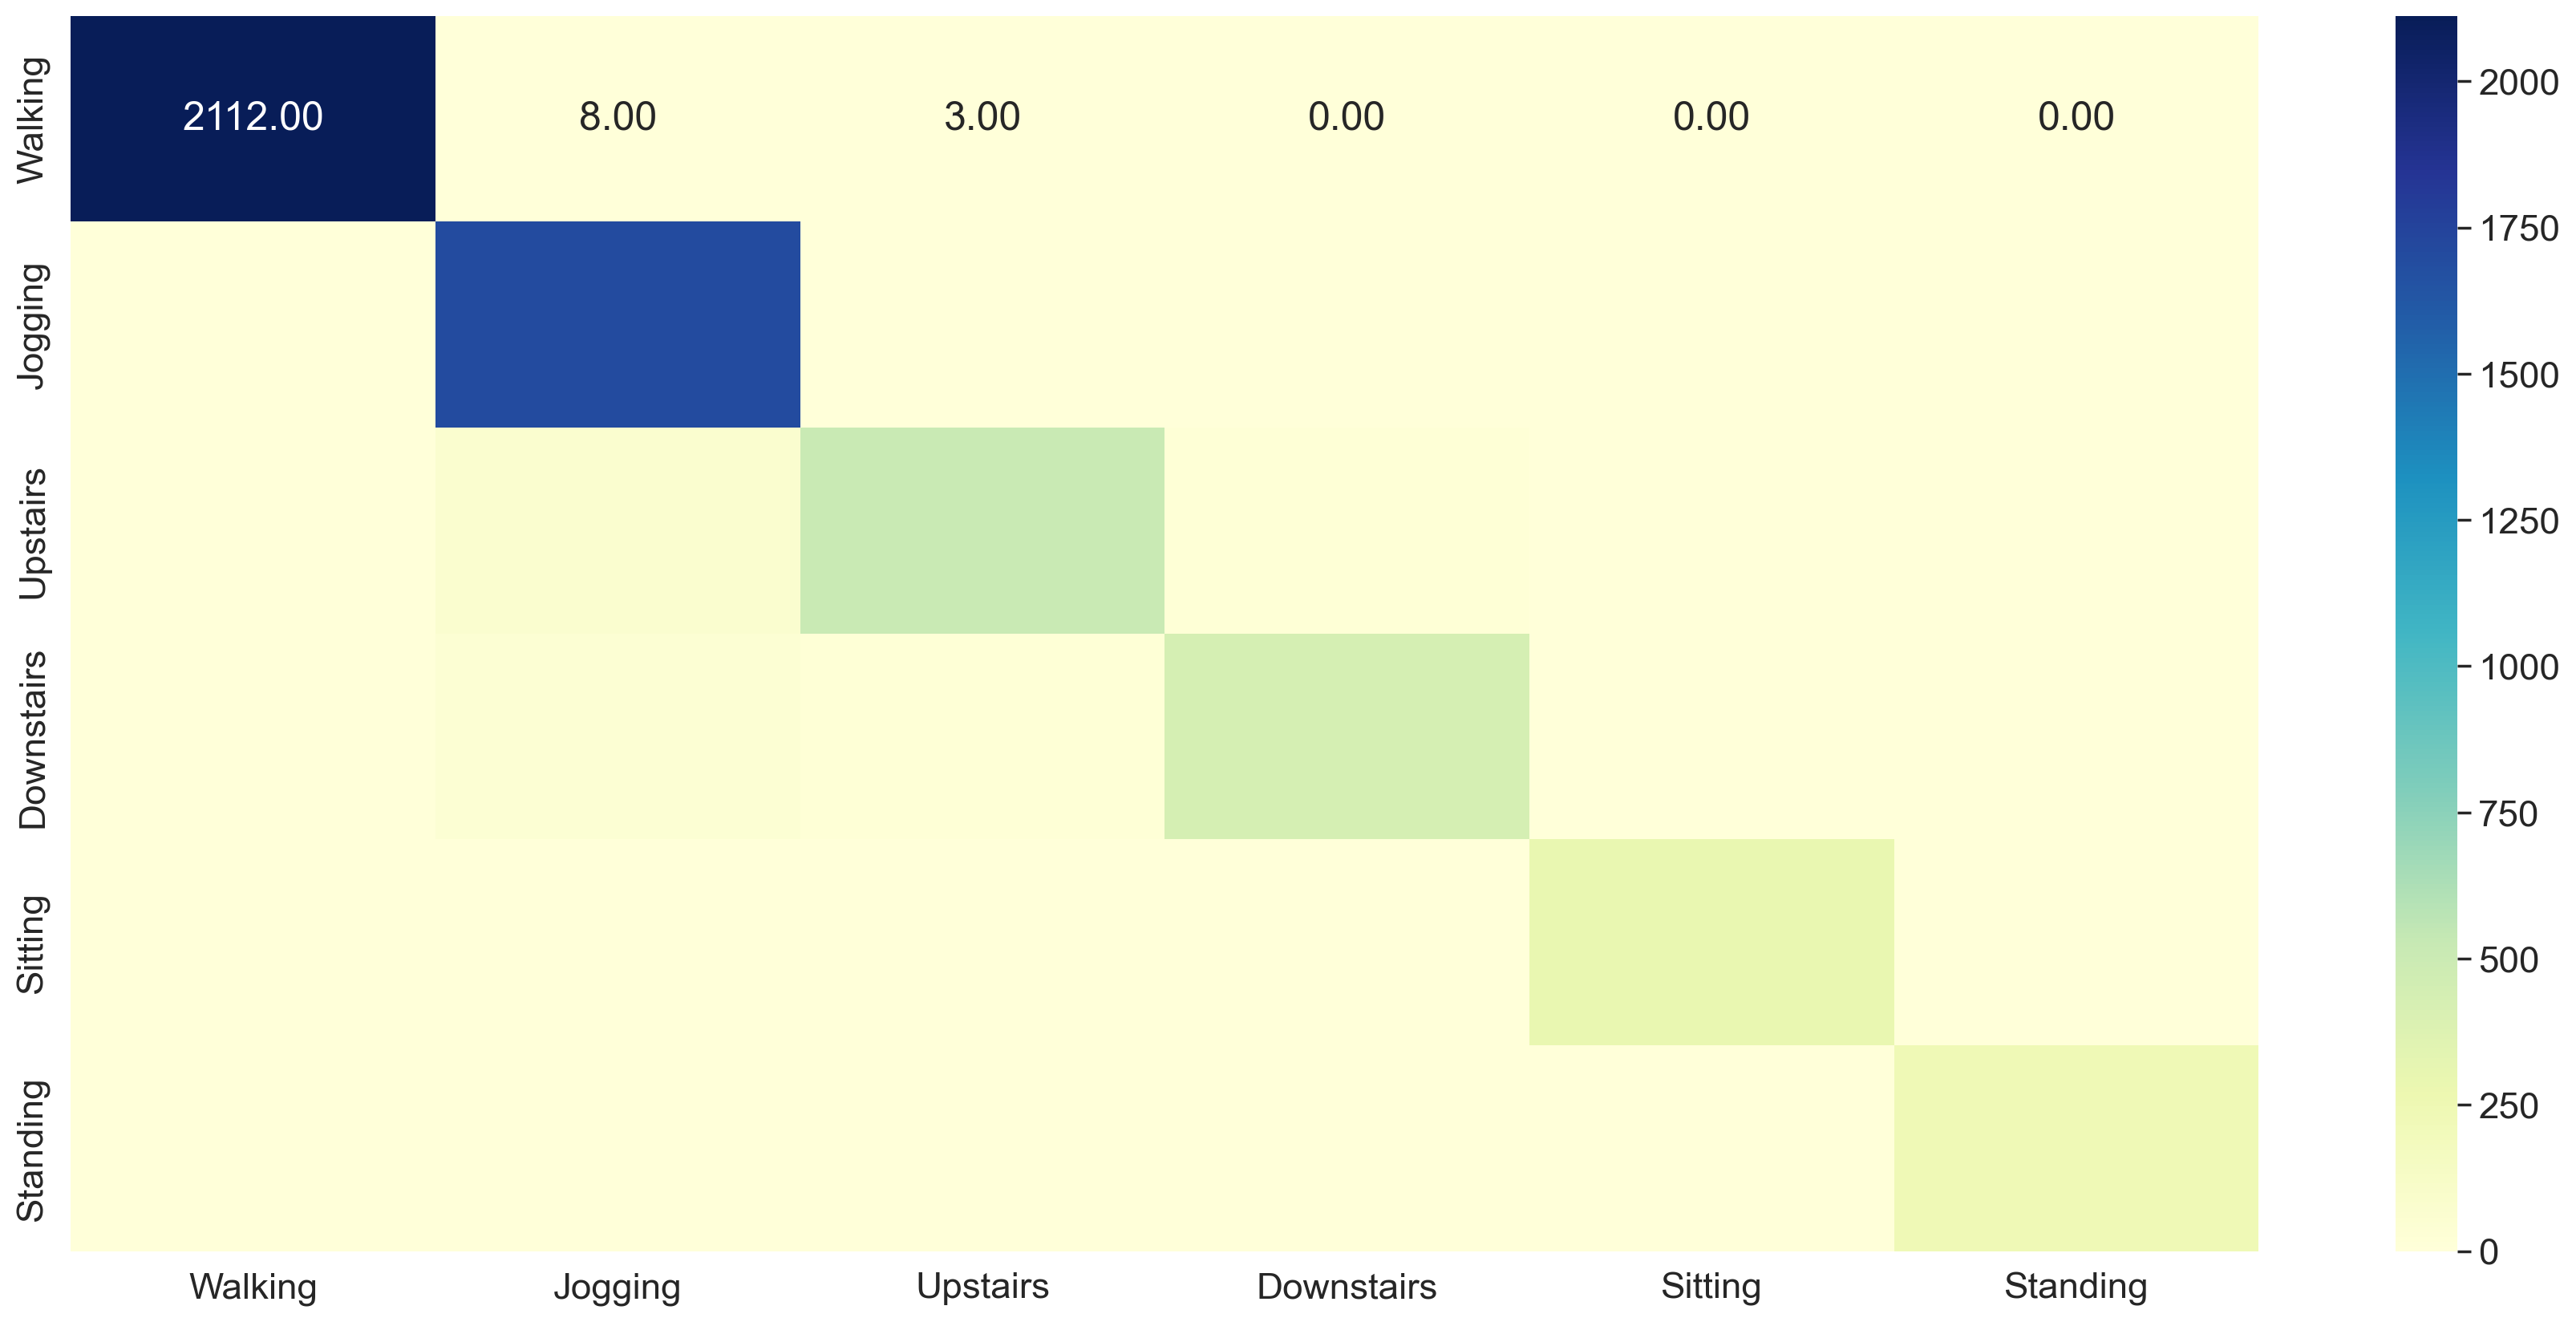

In [72]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')